<a href="https://colab.research.google.com/github/akatjizeu/Data-Science/blob/main/deakin-bridging/ML2/ML2_INN_Full_code_Learner_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
    <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>

<center><img src="https://img.freepik.com/free-photo/luxury-bedroom-suite-resort-high-rise-hotel-with-working-table_105762-1783.jpg?w=740&t=st=1654505493~exp=1654506093~hmac=fc1167df2b3797e32400448b458fd80afb85e31403c7689e0b1506023ff754a7" width="720"></center>



<center><font size=6>Hotel Booking Cancellation Prediction</font></center>

## Problem Statement

### Context

Many hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost, which benefits hotel guests. Still, it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.


The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing the necessary libraries

In [1]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries for metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Import librarires for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import libraries for Naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

#import libraries for SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.inspection import permutation_importance


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
# Read the data into a dataframe and view the first 10 rows
df = pd.read_csv('INNHotelsGroup.csv')
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [3]:
# Create a copy of the data to avoid editing the original data and view the first 5 rows
hotel = df.copy()

hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Overview

* Observations
* Sanity checks

In [4]:
#Display the first and last 5 rows of the dataset
pd.concat([hotel.head(), hotel.tail()])

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [5]:
#Check the columns data types
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* There seems to be no missing values in the data
* There are 19 columns 5 of which are of object type and the rest are numerical

In [6]:
#Print the number of columns and rows
print("The data has {} rows and {} columns".format(hotel.shape[0], hotel.shape[1]))

The data has 36275 rows and 19 columns


In [7]:
#Check the description of the data
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


* `Lead time`: Average booking is made ~85 days in advance, with very high variability (std ~86, max 443 days) therefore cancellations are more likely when lead times are long
* `No. of special requests`: Average is <1 (0.62), with most guests making none or one request hence higher requests indicate stronger booking commitment
* `Avg. price per room`: Mean price is ~103, with a wide range (min 0, max 540) therefore higher prices may link to increased cancellations
* `Repeated guests`: Very low proportion (~2.6%), repeat customers are rare but likely more reliable (lower cancellation risk)
* `No. of previous cancellations`: Almost negligible (mean ~0.02), but outliers exist (up to 13), important for flagging risky customers

In [8]:
#Check the description of object features
hotel.describe(include='object').T

,count,unique,top,freq
Booking_ID,36275,36275,INN36275,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


* Most object variables are categorical, since they have very few unique values


In [9]:
#MISSING VALUES

# Calculate missing values information
missing_info = hotel.isnull().agg(['sum', lambda x: (x.sum() / len(x)) * 100])

# Transpose and rename columns
missing_info = missing_info.T.rename(
    columns={'sum': 'Missing Value Count', '': 'Missing Value Percentage'}
)

# Reset index to make 'variable' a column
missing_info = missing_info.reset_index().rename(columns={'index': 'Variable'})

# Display the result
missing_info

,Variable,Missing Value Count,<lambda>
0,Booking_ID,0.0,0.0
1,no_of_adults,0.0,0.0
2,no_of_children,0.0,0.0
3,no_of_weekend_nights,0.0,0.0
4,no_of_week_nights,0.0,0.0
5,type_of_meal_plan,0.0,0.0
6,required_car_parking_space,0.0,0.0
7,room_type_reserved,0.0,0.0
8,lead_time,0.0,0.0
9,arrival_year,0.0,0.0


* There are no missing values in the data

In [10]:
#  It prints the objects unique values and their counts for each column.
for i in hotel.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(hotel[i].value_counts())
    print("*" * 50)

Unique values in Booking_ID are :
Booking_ID
INN36275    1
INN00001    1
INN00002    1
INN00003    1
INN00004    1
           ..
INN00023    1
INN00024    1
INN00025    1
INN00026    1
INN00027    1
Name: count, Length: 36275, dtype: int64
**************************************************
Unique values in type_of_meal_plan are :
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
**************************************************
Unique values in room_type_reserved are :
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
**************************************************
Unique values in market_segment_type are :
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: in

In [11]:
# Check uniqueness of values for each feature
hotel.nunique()

,0
Booking_ID,36275
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


* All object types will be made categorical

In [12]:
#Drop the features, BOOKING_ID, CustomerId and Surname
hotel.drop('Booking_ID', axis=1, inplace=True)

* The Booking_ID column was dropped because it has no significant analytical value in our problem

In [13]:
# Display the data without the Booking_ID column
hotel.sample(7)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
7085,2,0,0,1,Meal Plan 2,0,Room_Type 1,219,2017,9,4,Online,0,0,0,108.00,0,Canceled
22239,1,0,1,0,Meal Plan 1,0,Room_Type 1,111,2018,10,10,Offline,0,0,0,120.00,0,Canceled
33216,2,0,0,4,Meal Plan 1,0,Room_Type 4,61,2018,12,7,Online,0,0,0,96.90,1,Not_Canceled
14018,2,0,2,5,Meal Plan 1,0,Room_Type 1,31,2018,11,14,Online,0,0,0,64.67,1,Not_Canceled
6839,2,0,2,2,Not Selected,0,Room_Type 1,208,2018,7,30,Online,0,0,0,80.75,0,Canceled
6545,2,2,2,3,Meal Plan 1,0,Room_Type 1,67,2017,7,10,Offline,0,0,0,106.25,0,Not_Canceled
27883,2,0,0,2,Meal Plan 1,0,Room_Type 4,36,2018,4,29,Online,0,0,0,140.40,1,Not_Canceled


In [14]:
#Convert object data types to categorical
hotel['type_of_meal_plan'] = hotel['type_of_meal_plan'].astype('category')
hotel['room_type_reserved'] = hotel['room_type_reserved'].astype('category')
hotel['market_segment_type'] = hotel['market_segment_type'].astype('category')
hotel['booking_status'] = hotel['booking_status'].astype('category')

In [15]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

EDA Questions:
* **What are the busiest months in the hotel?**
  * The busiest months are October, followed by September and then august
* **Which market segment do most of the guests come from?**
  * Most guests come from the online segment
* **Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**
  * **Aviation:** Prices are fairly consistent and stable, with little variation
  * **Complementary:** Almost all values are near zero, reflecting free or heavily discounted stays
  * **Corporate:** Moderate rates, generally lower than Online and Offline, but higher than Complementary
  * **Offline:** Prices are higher and more spread out, with several extreme outliers
  * **Online:** Rates are also high and widely spread, with many outliers, often higher than Offline
* **What percentage of bookings are canceled?**
  * 32.8% of bookings are cancelled
* **Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**
  * The percentage of repeating guests who cancelled the booking is 1.7%
* **Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**
  * Guests with 0 special requests have the highest cancellations
  * As the number of special requests increases, cancellations drop sharply, with 3 or more requests almost always honored
  * This makes no_of_special_requests another possible predictor of booking reliability

Note: These are a few questions to help guide you in performing EDA. EDA has to be done beyond this set of questions to obtain the maximum point in the corresponding rubric section.

**Functions to be used in univariate EDA**

In [16]:
def univariate_analysis_cont(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    ax_box2.set_title(f'Box plot of {feature}') # Add title to boxplot
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_title(f'Distribution of {feature}') # Add title to histogram

In [17]:
def univariate_analysis_discrete(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )
    ax.set_title(f'Count Plot of {feature}') # Add title to plot

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    display(data[feature].value_counts().T)

In [18]:
# A function that takes a dataframe and a categorical variable and displays two appropriate visuals for the variable for EDA
def univariate_analysis_categorical(df, var):
    plt.figure(figsize=(12, 5))

    # Count plot
    #plt.subplot(1, 2, 1)
    ax = sns.countplot(data=df, x=var, palette='viridis')
    plt.title(f'Count Plot of {var}')
    plt.xticks(rotation=45, ha='right')

    # Add count numbers on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

### Univariate Analysis

**Distribution of Average price per room**

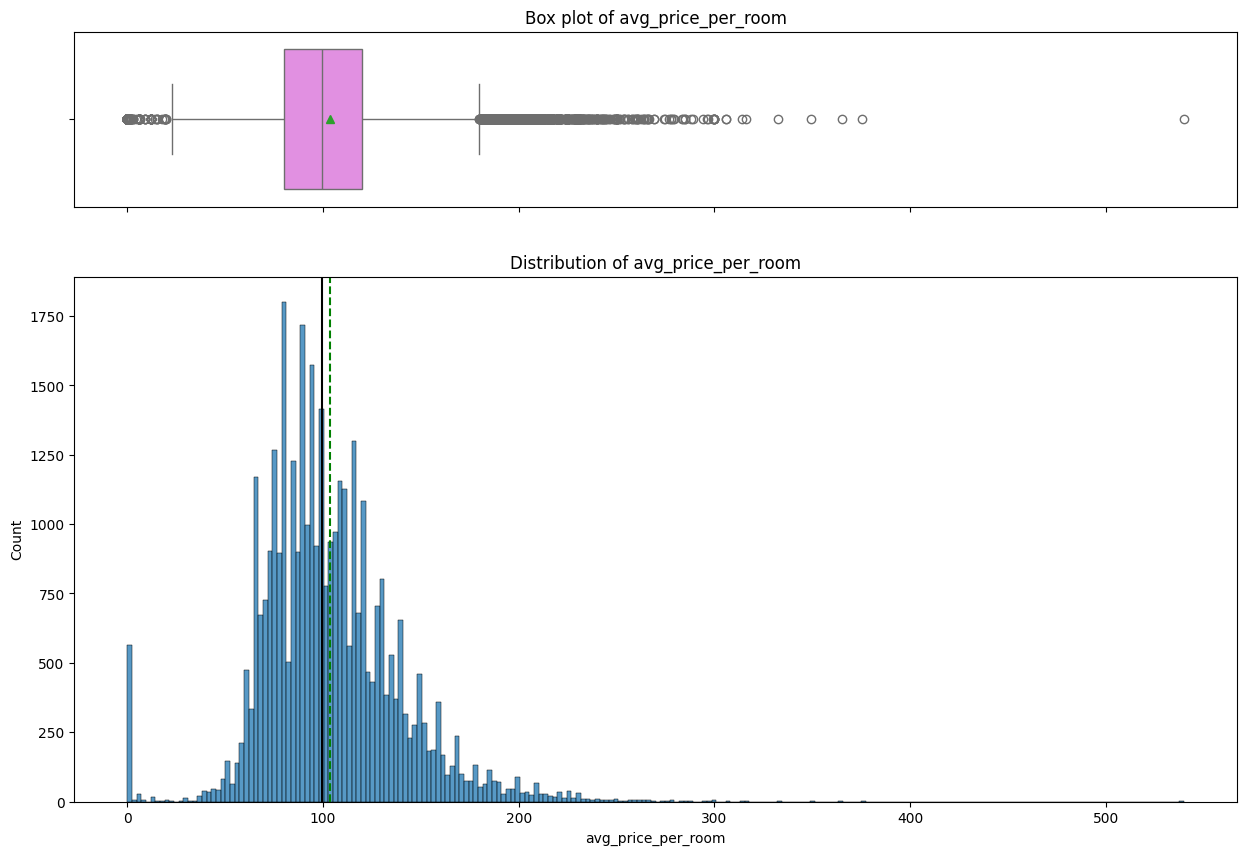

In [19]:
univariate_analysis_cont(hotel, 'avg_price_per_room')

* The variable has outliers and most of them are on the upper end

**Distribution of Lead time**

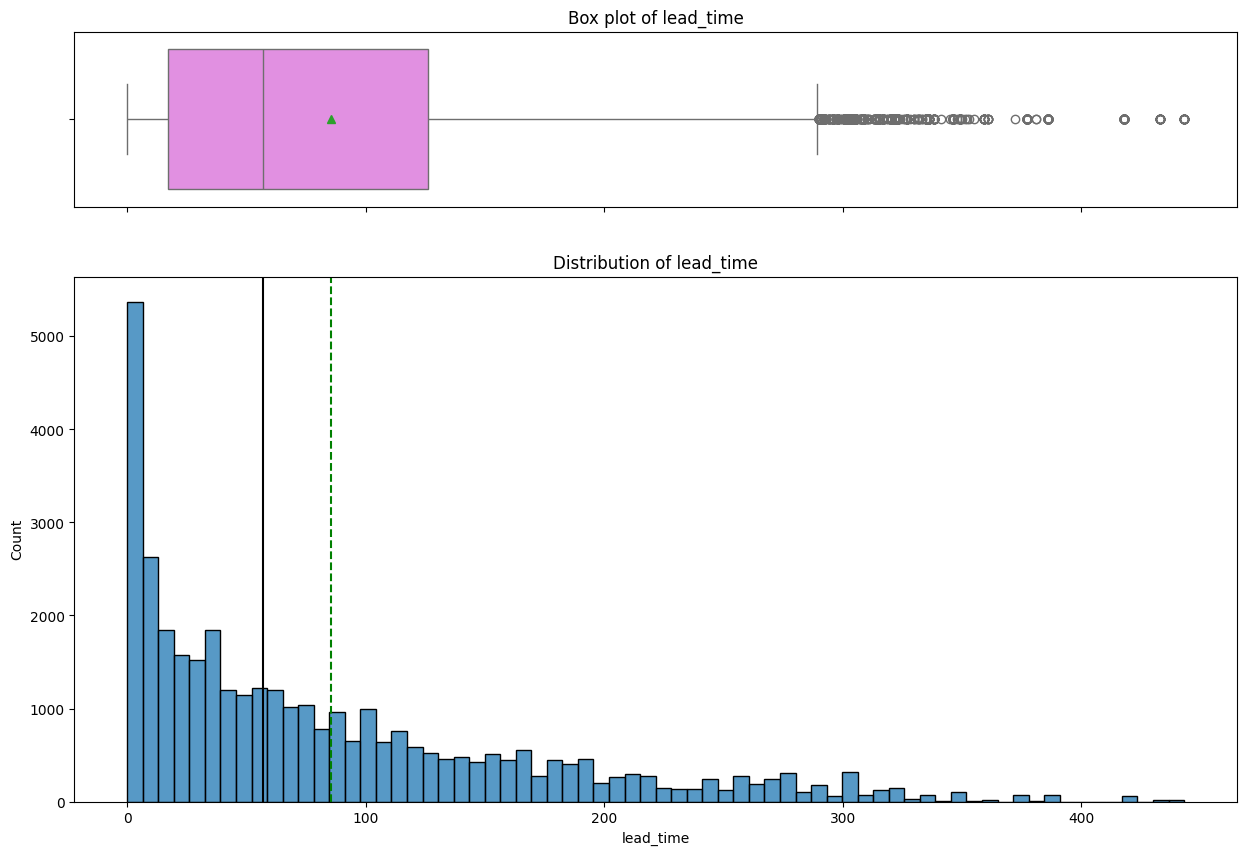

In [20]:
univariate_analysis_cont(hotel, 'lead_time')

* It has outliers on the upper end
* This makes the distribution of the variable right skewed

**No of adults**

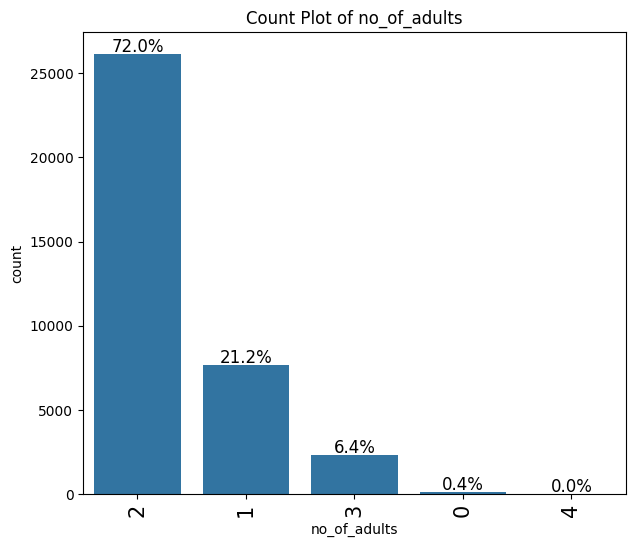

,count
no_of_adults,
2,26108
1,7695
3,2317
0,139
4,16


In [21]:
univariate_analysis_discrete(hotel, 'no_of_adults', perc=True)

* Most reservations made featured two adults which could mean that couples made more reservations or people preferred to share rooms to save costs


**No of children**

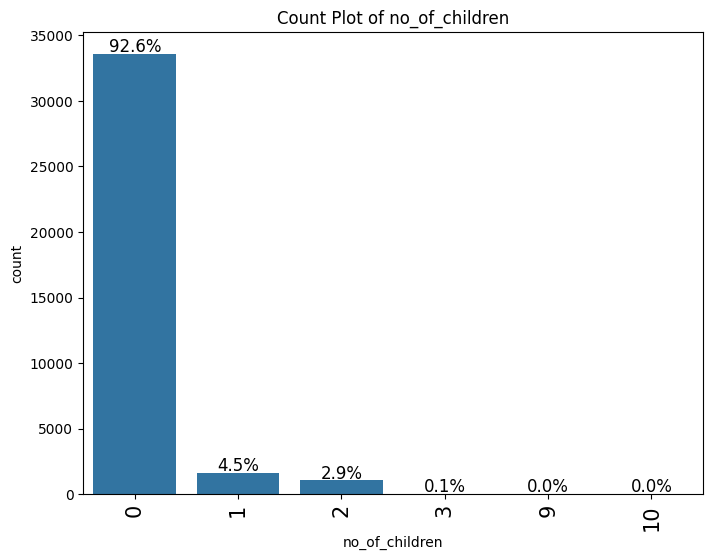

,count
no_of_children,
0,33577
1,1618
2,1058
3,19
9,2
10,1


In [22]:
univariate_analysis_discrete(hotel, 'no_of_children', perc=True)

* More than 92% of the reservations made had 0 children
* Reservations made with 9 and 10 number of children are strange values and we might have to delete the values or change them to 3
* On those reservations that had children most of them had 1 and 2 children


**Replace 9 and 10 children with 3**

In [23]:
hotel["no_of_children"] = hotel["no_of_children"].replace([9, 10], 3)

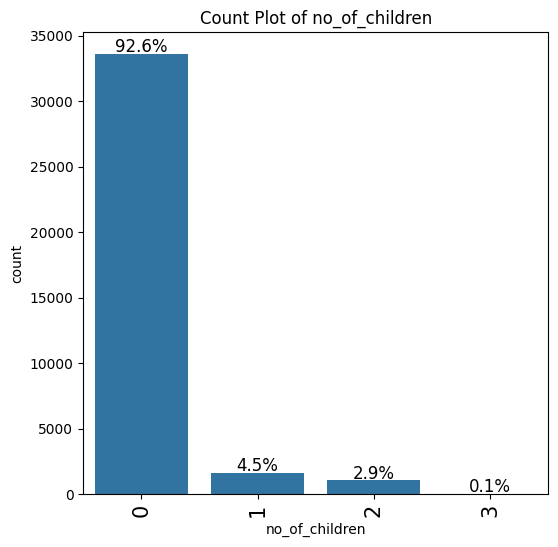

,count
no_of_children,
0,33577
1,1618
2,1058
3,22


In [24]:
univariate_analysis_discrete(hotel, 'no_of_children', perc=True)

**No of weekend nights**

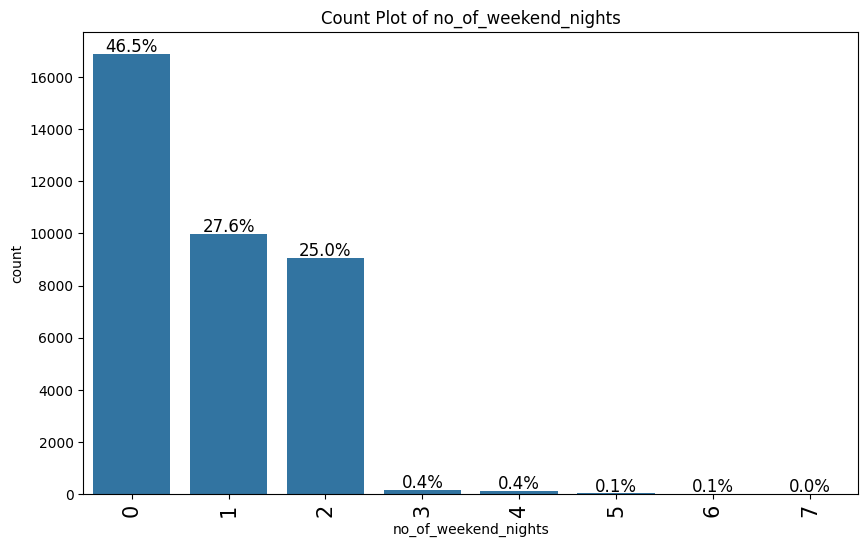

,count
no_of_weekend_nights,
0,16872
1,9995
2,9071
3,153
4,129
5,34
6,20
7,1


In [25]:
univariate_analysis_discrete(hotel, 'no_of_weekend_nights', perc=True)

* Most of the reservations were not made during the weekend
* Those that had weekend nights most had 1 weekend night, then 2 weekend nights and 7 weekend nights had the least reservations

**No fo week nights**

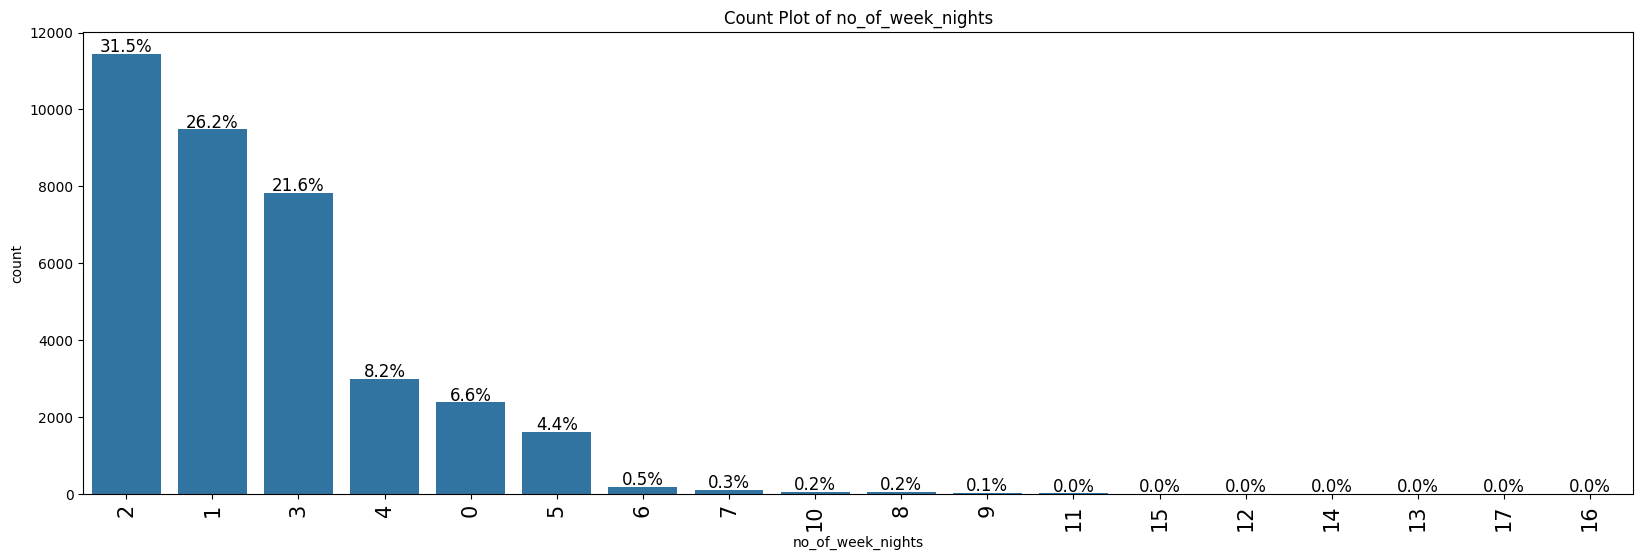

,count
no_of_week_nights,
2,11444
1,9488
3,7839
4,2990
0,2387
5,1614
6,189
7,113
10,62


In [26]:
univariate_analysis_discrete(hotel, 'no_of_week_nights', perc=True)

* Most reservations were made with 2, 1 and 3 week nights in that order as the top 3
* Some reservations had 0 week days reserved, which meant they were entirely weekend reservations

**Type of meal plan**

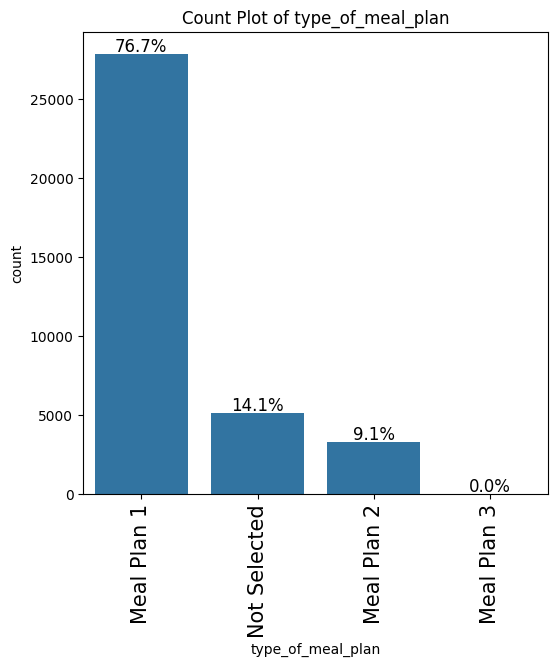

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305
Meal Plan 3,5


In [27]:
univariate_analysis_discrete(hotel, 'type_of_meal_plan', perc=True)

* Most customers prefer meal plan 1
* A good number of clients did not select the type of meal plan
* Meal plan 3 is the least preffered

**Required car parking space**

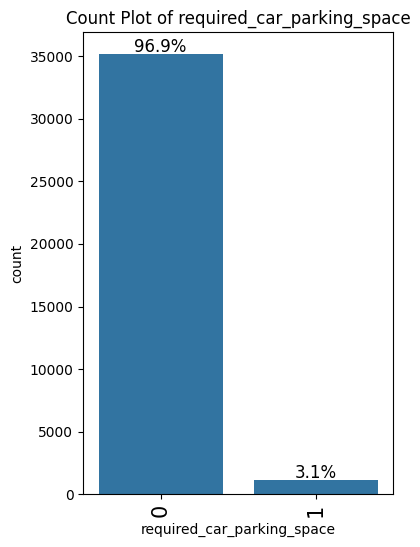

,count
required_car_parking_space,
0,35151
1,1124


In [28]:
univariate_analysis_discrete(hotel, 'required_car_parking_space', perc=True)

* More than 96% of the reservations did not require car parking space

**Room type reserved**

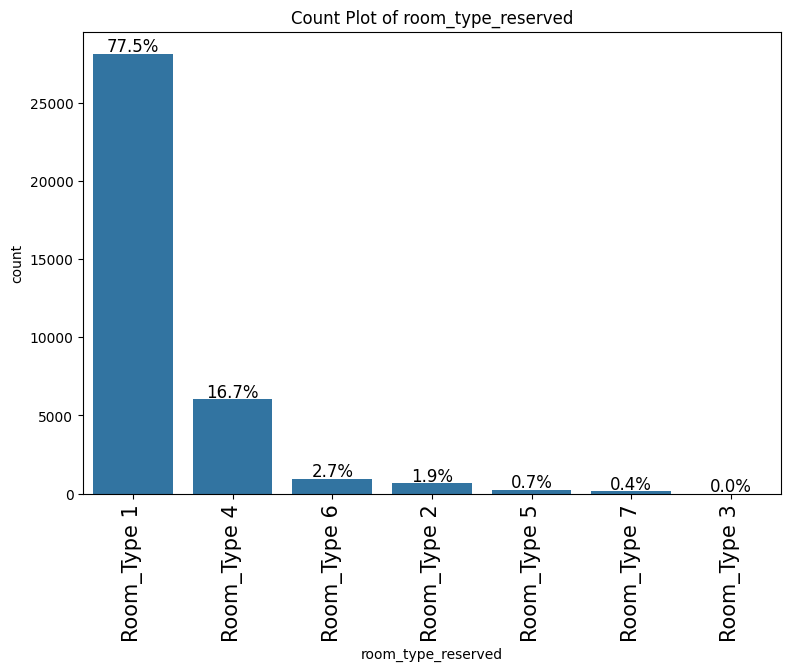

,count
room_type_reserved,
Room_Type 1,28130
Room_Type 4,6057
Room_Type 6,966
Room_Type 2,692
Room_Type 5,265
Room_Type 7,158
Room_Type 3,7


In [29]:
univariate_analysis_discrete(hotel, 'room_type_reserved', perc=True)

* Room type 1 is the most prevalent with most reservations made to the hotel
* Room type 3 is the least prefered in all reservations

**Arrival year**

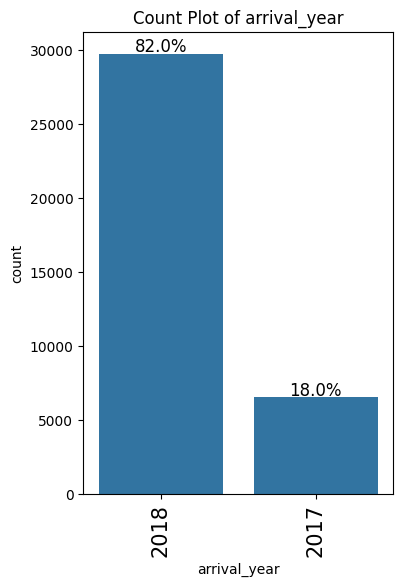

,count
arrival_year,
2018,29761
2017,6514


In [30]:
univariate_analysis_discrete(hotel, 'arrival_year', perc=True)

* According to this data most arrivals were in the year 2018

**Arrival month**

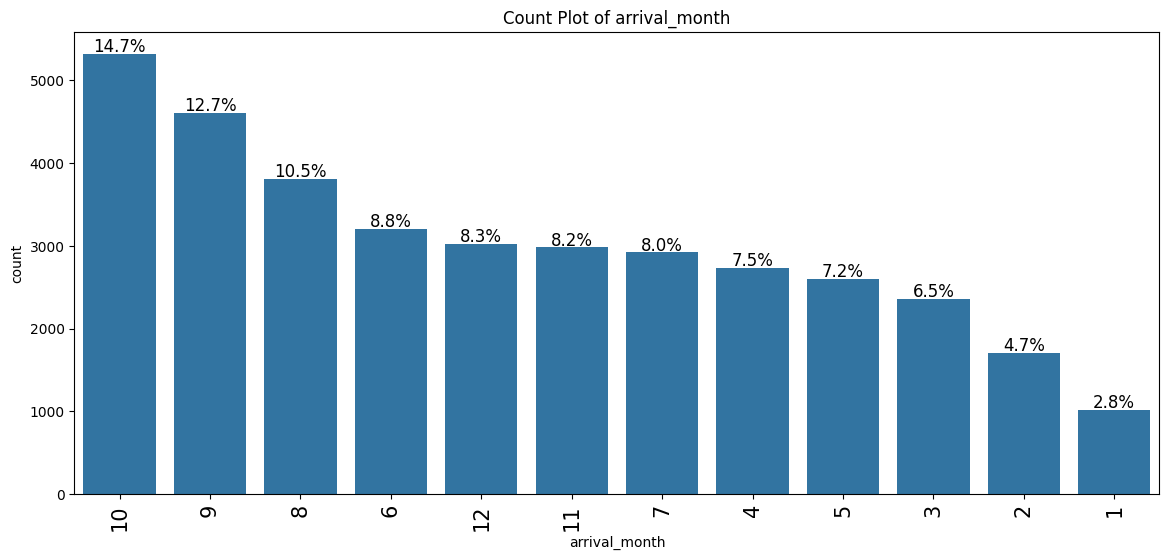

,count
arrival_month,
10,5317
9,4611
8,3813
6,3203
12,3021
11,2980
7,2920
4,2736
5,2598


In [31]:
univariate_analysis_discrete(hotel, 'arrival_month', perc=True)

* The least arrivals were made in January
* The busiest months are October, September and August in that order from the busiest

**Arrival date(day)**

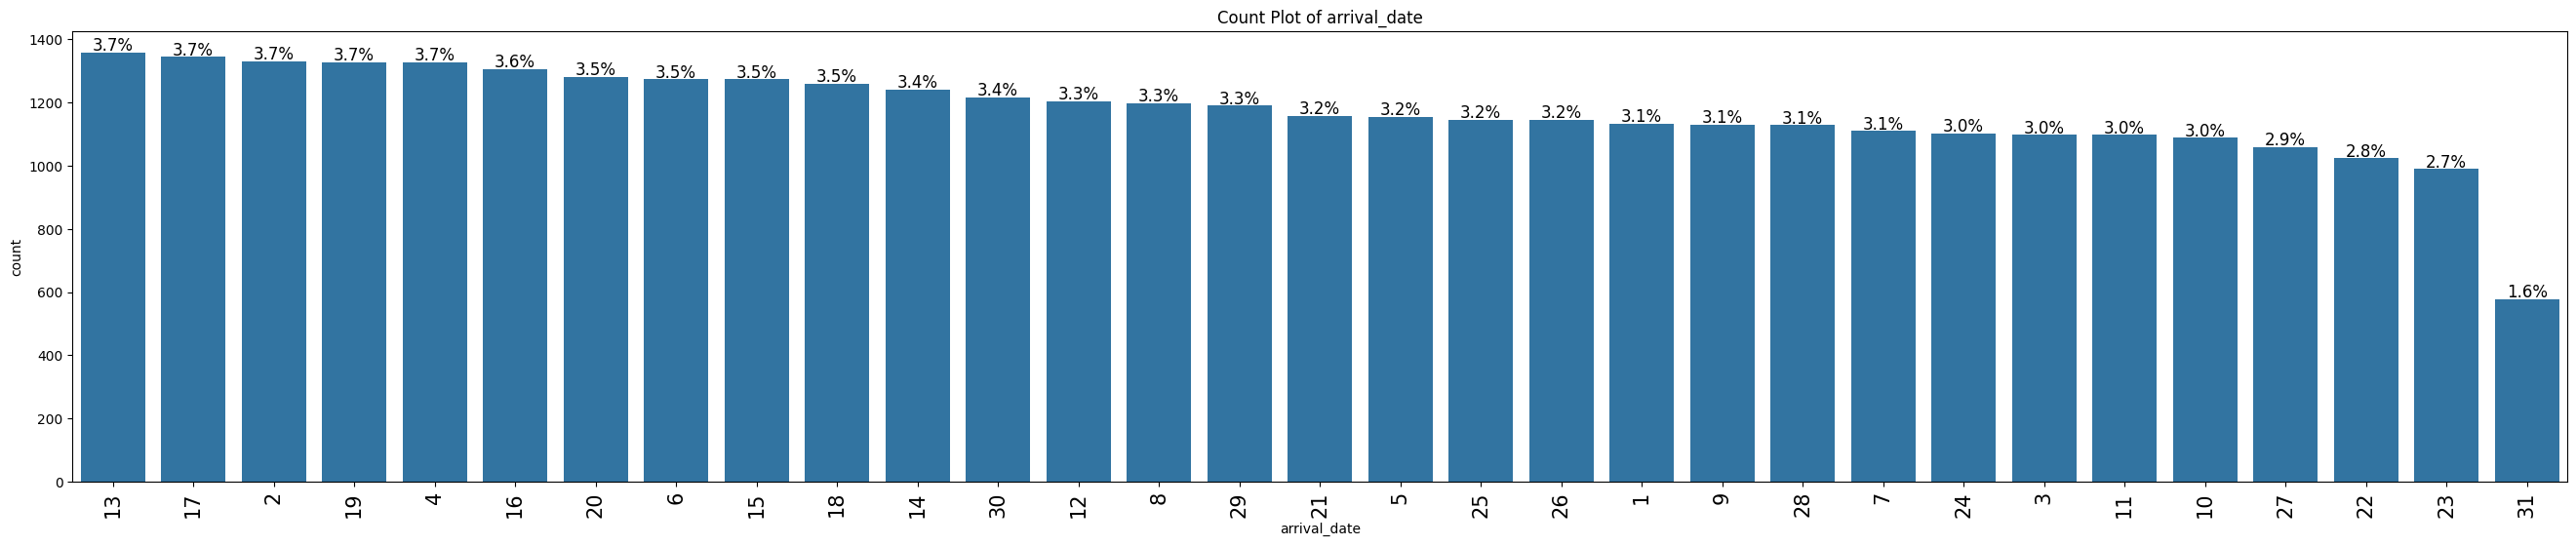

,count
arrival_date,
13,1358
17,1345
2,1331
19,1327
4,1327
16,1306
20,1281
6,1273
15,1273


In [32]:
univariate_analysis_discrete(hotel, 'arrival_date', perc=True)

* The 13th is the most prevalent day of months that the arrivals for the reservations were made
* Generally the arrival date (date of the month) is similar on all the days of the month
* The 31st is the day with the least number of arrivals

**Markert segment type**

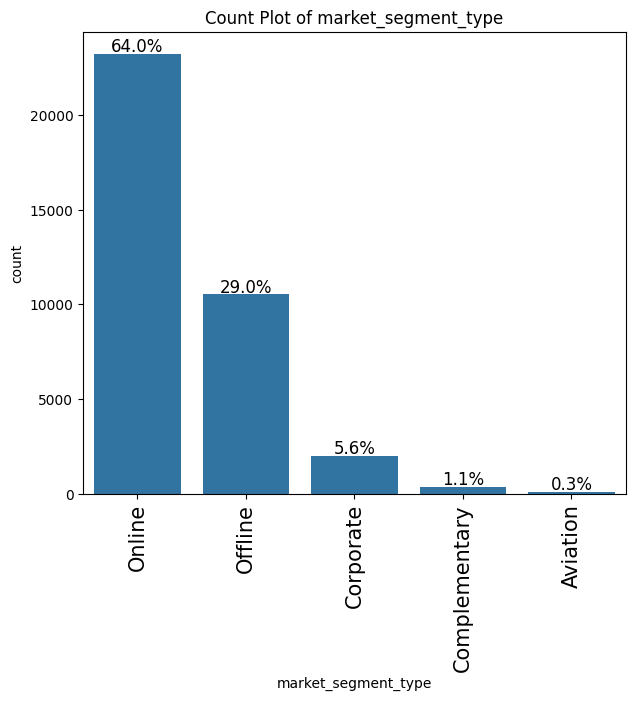

,count
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


In [33]:
univariate_analysis_discrete(hotel, 'market_segment_type', perc=True)

* Most customers come from the online segment more than the rest of the segment types

**Repeated guest**

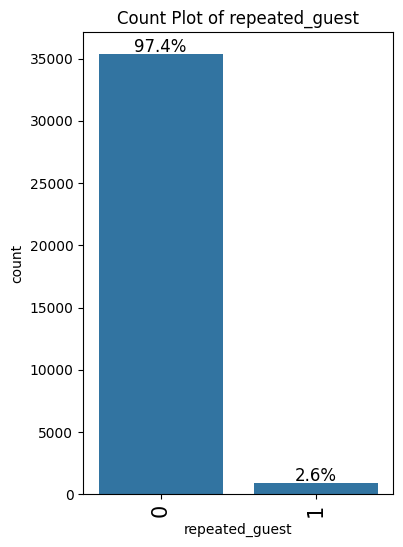

,count
repeated_guest,
0,35345
1,930


In [34]:
univariate_analysis_discrete(hotel, 'repeated_guest', perc=True)

* More than 97% of the customers who made reservations were non-repeat customers

**No fo previous cancellations**

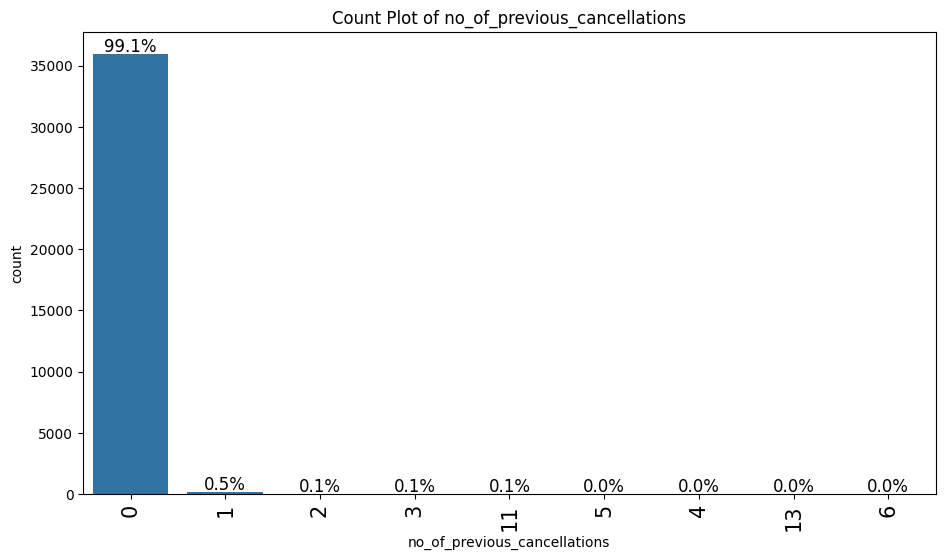

,count
no_of_previous_cancellations,
0,35937
1,198
2,46
3,43
11,25
5,11
4,10
13,4
6,1


In [35]:
univariate_analysis_discrete(hotel, 'no_of_previous_cancellations', perc=True)

* More than 99% of the customers who made reservations had not made any cancellations in the previous reservations

**No of previous bookings not cancelled**

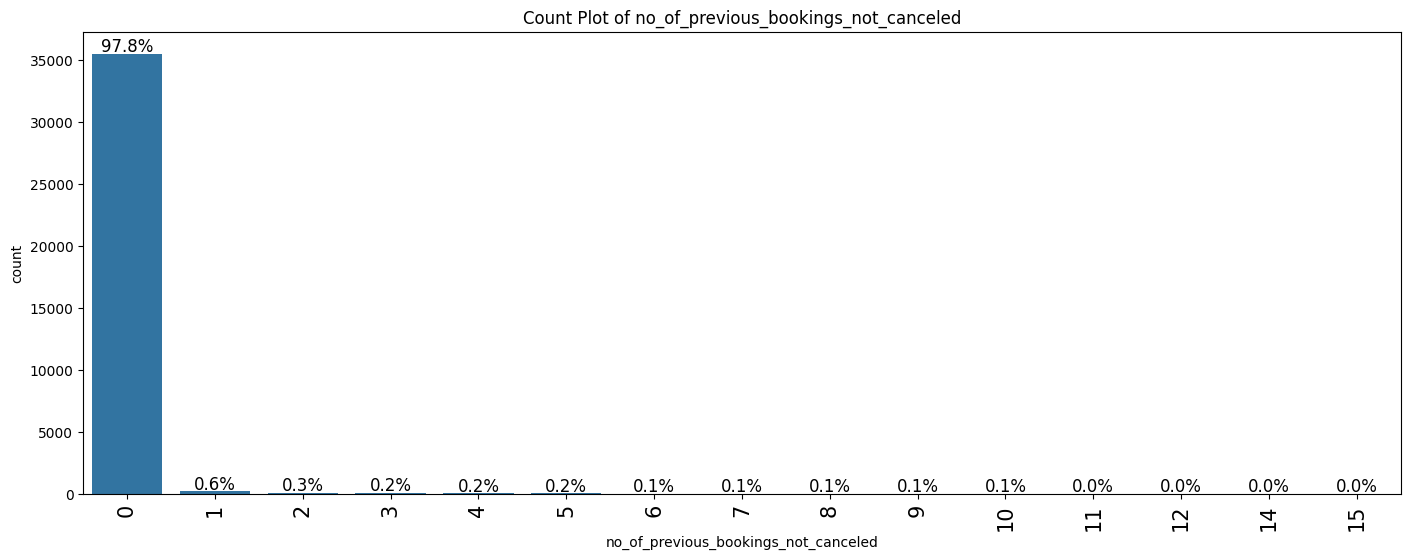

,count
no_of_previous_bookings_not_canceled,
0,35463
1,228
2,112
3,80
4,65
5,60
6,36
7,24
8,23


In [36]:
univariate_analysis_discrete(hotel, 'no_of_previous_bookings_not_canceled', perc=True, n=15)

* More than 97% of the customers who made reservations have not cancleed any of their previous bookings

**No of special requests**

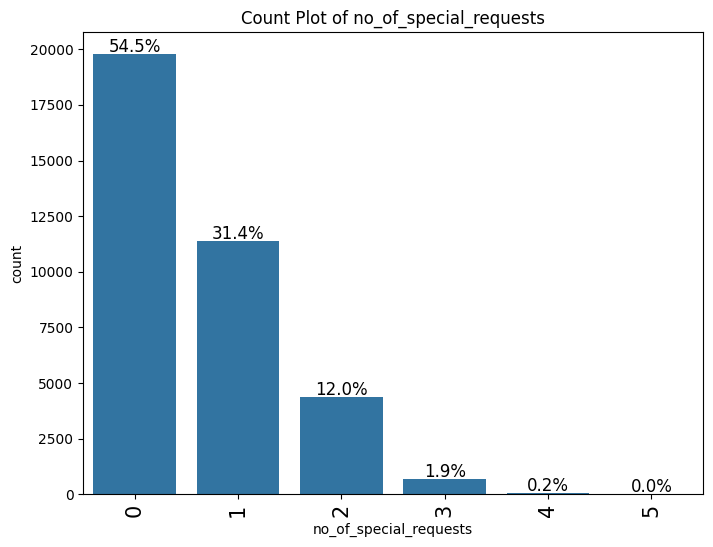

,count
no_of_special_requests,
0,19777
1,11373
2,4364
3,675
4,78
5,8


In [37]:
univariate_analysis_discrete(hotel, 'no_of_special_requests', perc=True)

* More than half of the reservaations made had no special requests
* On those that made requests a lot of them made 1 request

**Booking status**

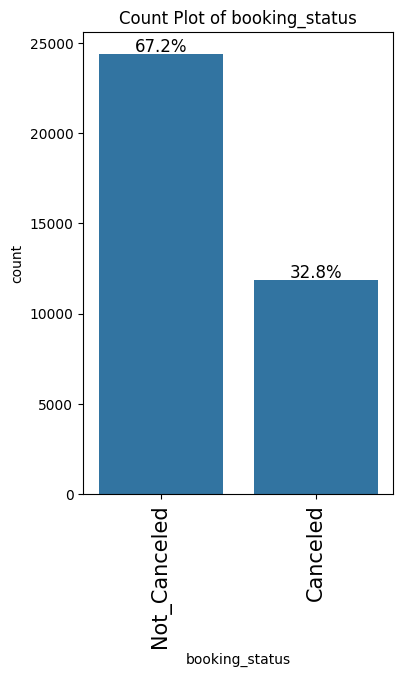

,count
booking_status,
Not_Canceled,24390
Canceled,11885


In [38]:
univariate_analysis_discrete(hotel, 'booking_status', perc=True)

* More than 67% of the booking were not cancelled
* This means our data has imbalanced data for the target variable
* We will have to encode the variable to 0 and 1

In [39]:
# Encoding booking status to 0 and 1
hotel['booking_status'] = hotel["booking_status"].apply(lambda x: 0 if x =='Not_Canceled' else 1)

In [40]:
hotel['booking_status'].value_counts()

,count
booking_status,
0,24390
1,11885


In [41]:
#Convert booking status to int64
hotel['booking_status'] = hotel['booking_status'].astype('int64')

### Bivariate Analysis

In [42]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    # Add title to the plot
    plt.title(f'Stacked Bar Plot of {predictor} by {target}')
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [43]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of " + predictor + " for " + target + "=" + str(target_uniq[0])) # Add title
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of " + predictor + " for " + target + "=" + str(target_uniq[1])) # Add title
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot of " + predictor + " w.r.t " + target) # Add title
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) of " + predictor + " w.r.t " + target) # Add title
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

**correlation**

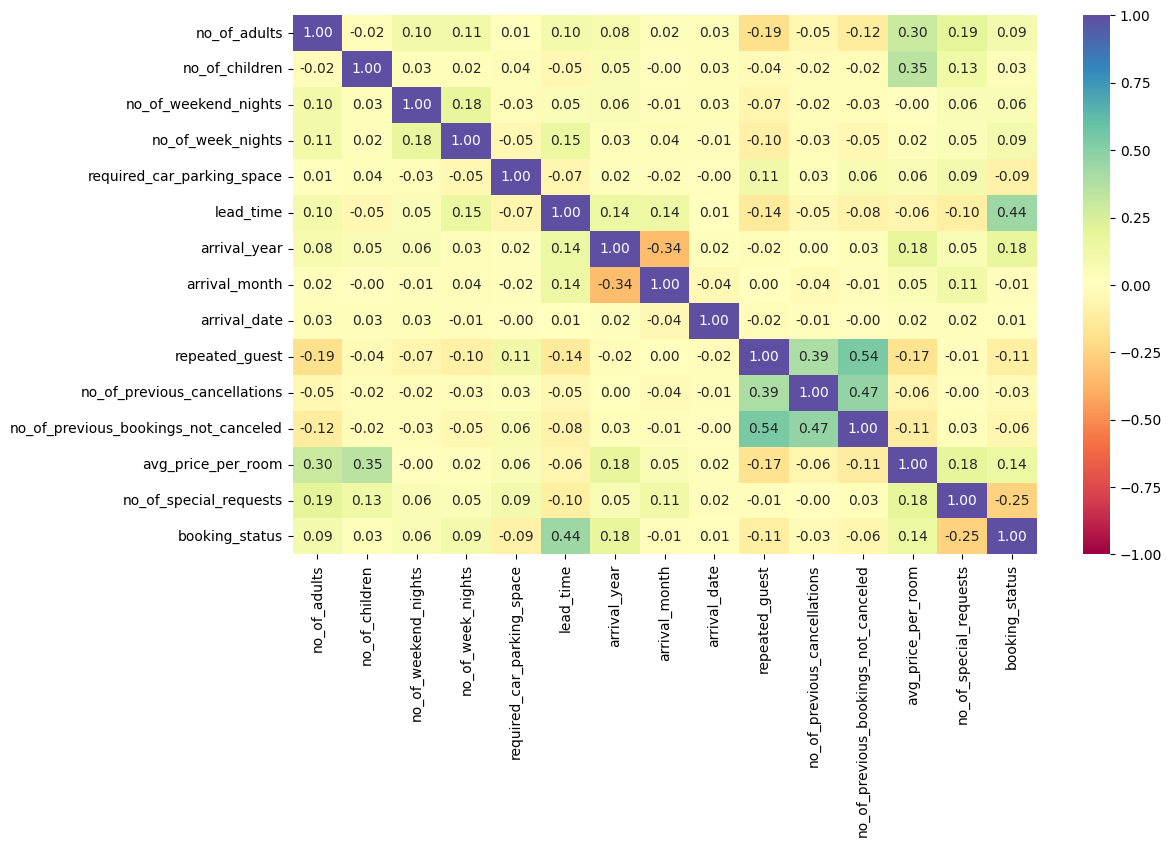

In [44]:
# Correlation of the numerical values
numeric_vars = hotel.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    hotel[numeric_vars].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


* no_of_special_requests has the Strongest negative correlation with booking_status
* Features like arrival_date, arrival_month, no_of_children, required_car_parking_space show almost no correlation with cancellations
* repeated_guest and no_of_previous_bookings_not_canceled show moderate negative correlations with the booking status
* ead_time and avg_price_per_room have positive correlations with booking_status

**Lead time vs booking status**

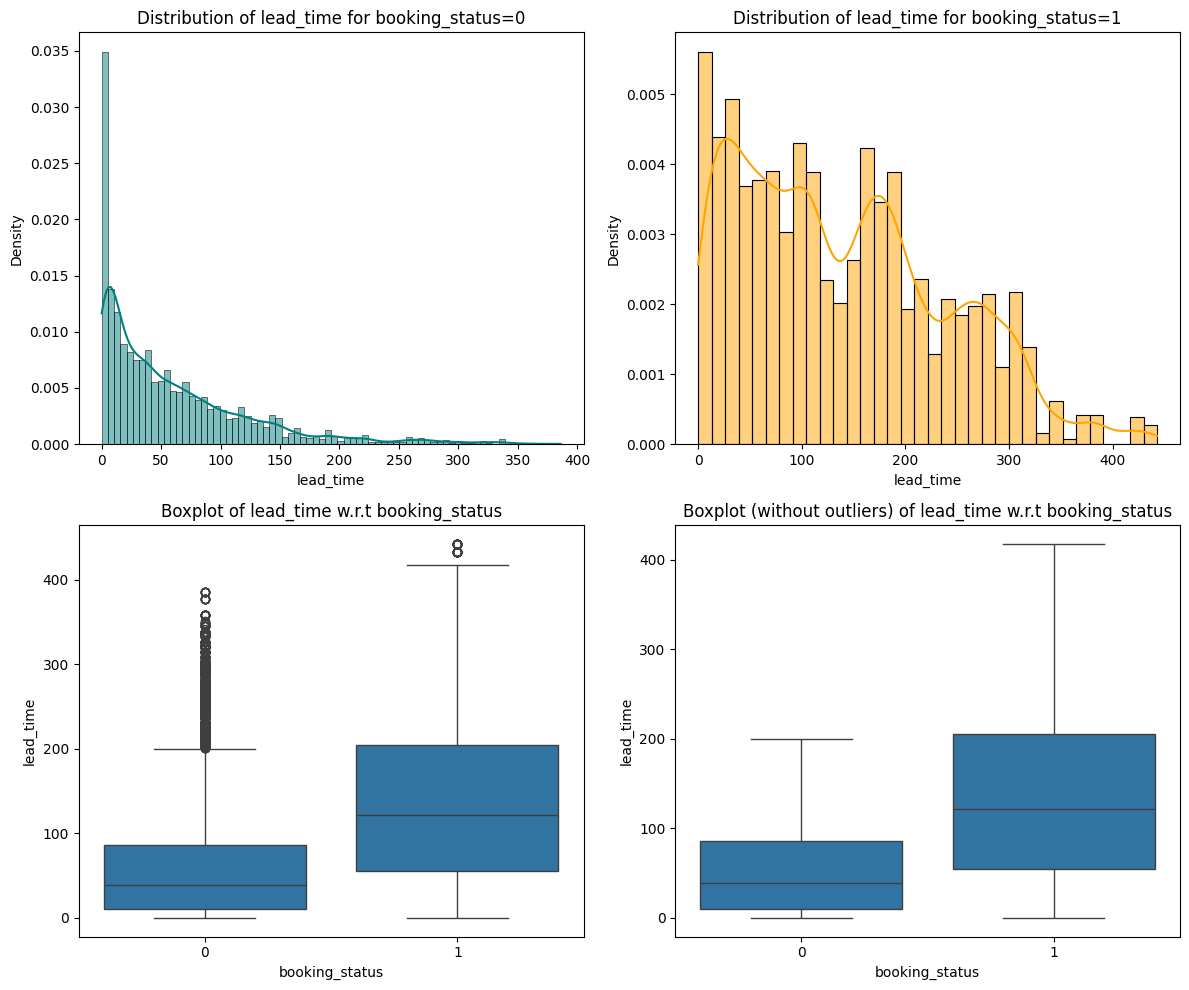

In [45]:
distribution_plot_wrt_target(hotel, 'lead_time', 'booking_status')

* Bookings with short lead times are mostly honored, while longer lead times show higher cancellation rates
* The density plots confirm that canceled bookings are skewed towards longer lead times, while non-canceled cluster near short lead times.
* Boxplots show the median lead time for cancellations is much higher than non-cancellations
* Outliers exist mainly for non-canceled bookings but trimming them confirms the same trend.

**Average price per room vs booking status**

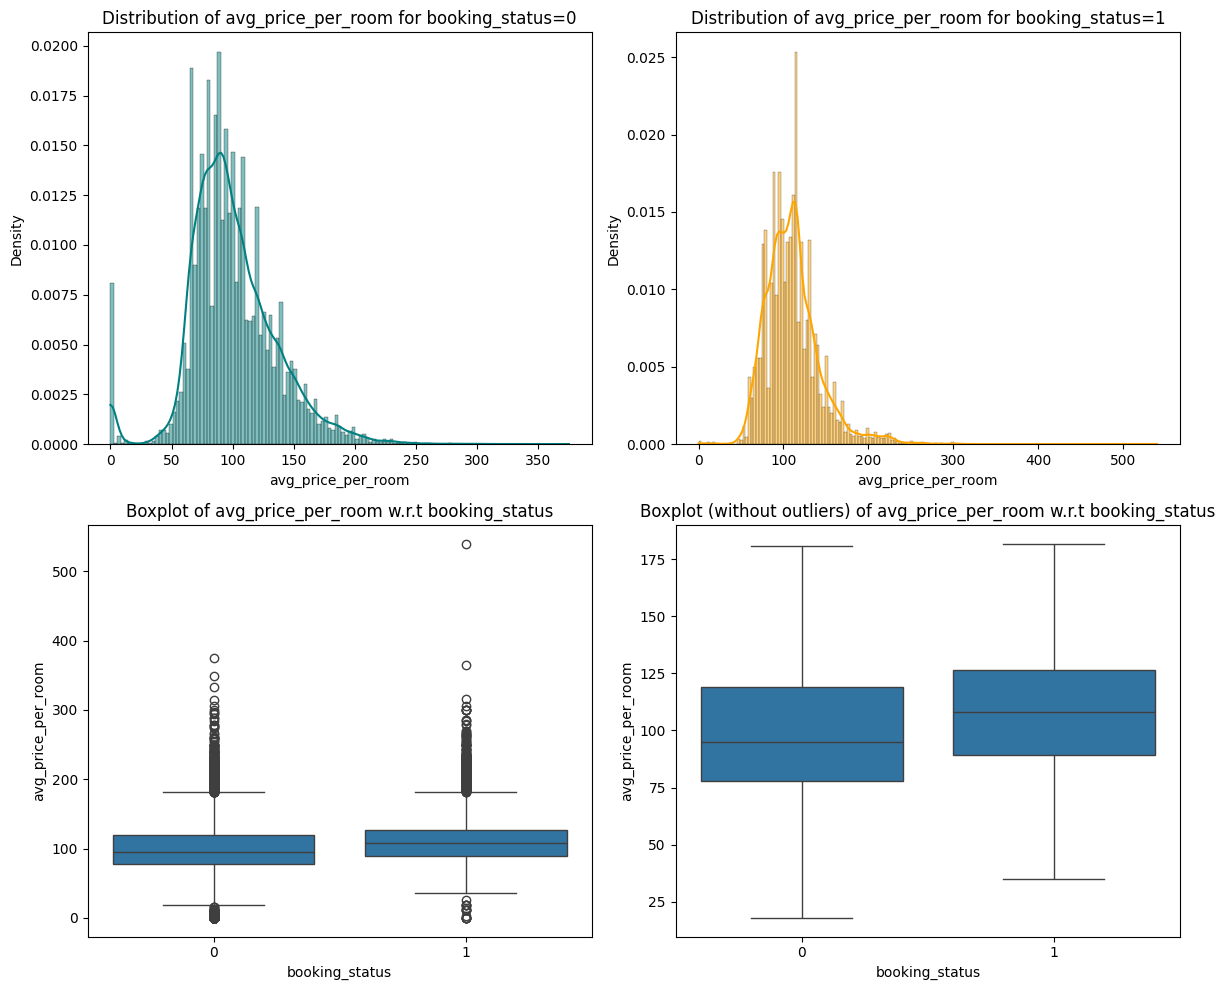

In [46]:
distribution_plot_wrt_target(hotel, 'avg_price_per_room', 'booking_status')

* Canceled bookings tend to have higher average room prices than non-canceled ones
* Density plots show a clear right shift for cancellations, indicating price sensitivity
* Boxplots confirm the median price is higher for canceled bookings
* Removing outliers still shows cancellations linked with higher room prices

**no of adults vs booking status**

booking_status      0      1    All
no_of_adults                       
All             24390  11885  36275
2               16989   9119  26108
1                5839   1856   7695
3                1454    863   2317
0                  95     44    139
4                  13      3     16
------------------------------------------------------------------------------------------------------------------------


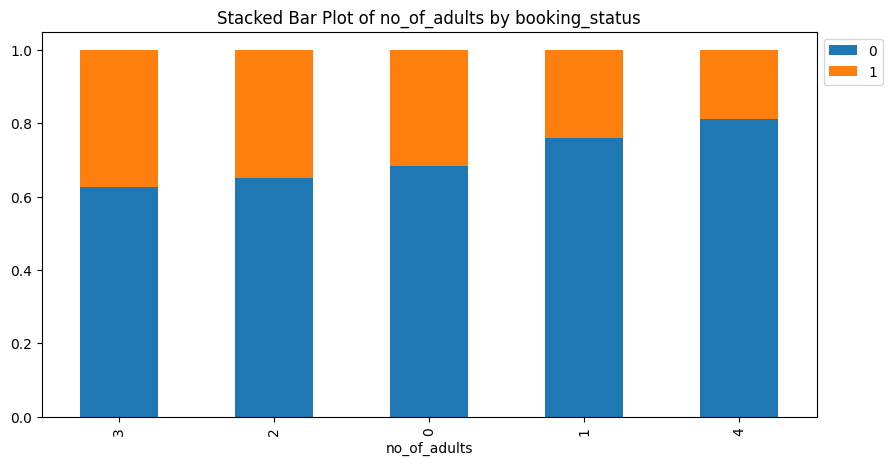

In [47]:
stacked_barplot(hotel, 'no_of_adults', 'booking_status')

* The higher the number of adults the more successful bookings, while fewer adults  have relatively higher cancellation rates
* This suggests that no_of_adults could be an important predictor variable in modeling booking_status

**No of chiildren vs booking status**

booking_status      0      1    All
no_of_children                     
All             24390  11885  36275
0               22695  10882  33577
1                1078    540   1618
2                 601    457   1058
3                  16      6     22
------------------------------------------------------------------------------------------------------------------------


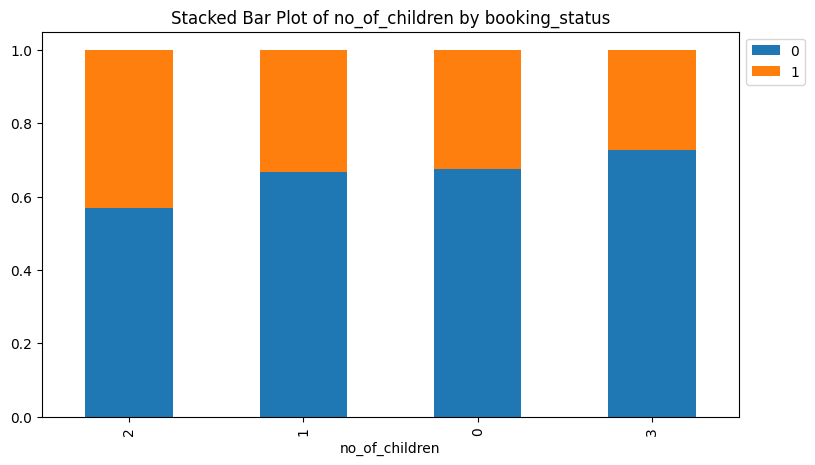

In [48]:
stacked_barplot(hotel, 'no_of_children', 'booking_status')

* Families with 2 children have higher cancellation rates , while bookings with 0 or 3 children tend to be more likely honored
* This means that the no_of_children may influence booking behavior and should be considered as a potential feature in predicting cancellations

**No fo week nights vs booking status**

booking_status         0      1    All
no_of_week_nights                     
All                24390  11885  36275
2                   7447   3997  11444
3                   5265   2574   7839
1                   6916   2572   9488
4                   1847   1143   2990
0                   1708    679   2387
5                    982    632   1614
6                    101     88    189
10                     9     53     62
7                     61     52    113
8                     30     32     62
9                     13     21     34
11                     3     14     17
15                     2      8     10
12                     2      7      9
13                     0      5      5
14                     3      4      7
16                     0      2      2
17                     1      2      3
------------------------------------------------------------------------------------------------------------------------


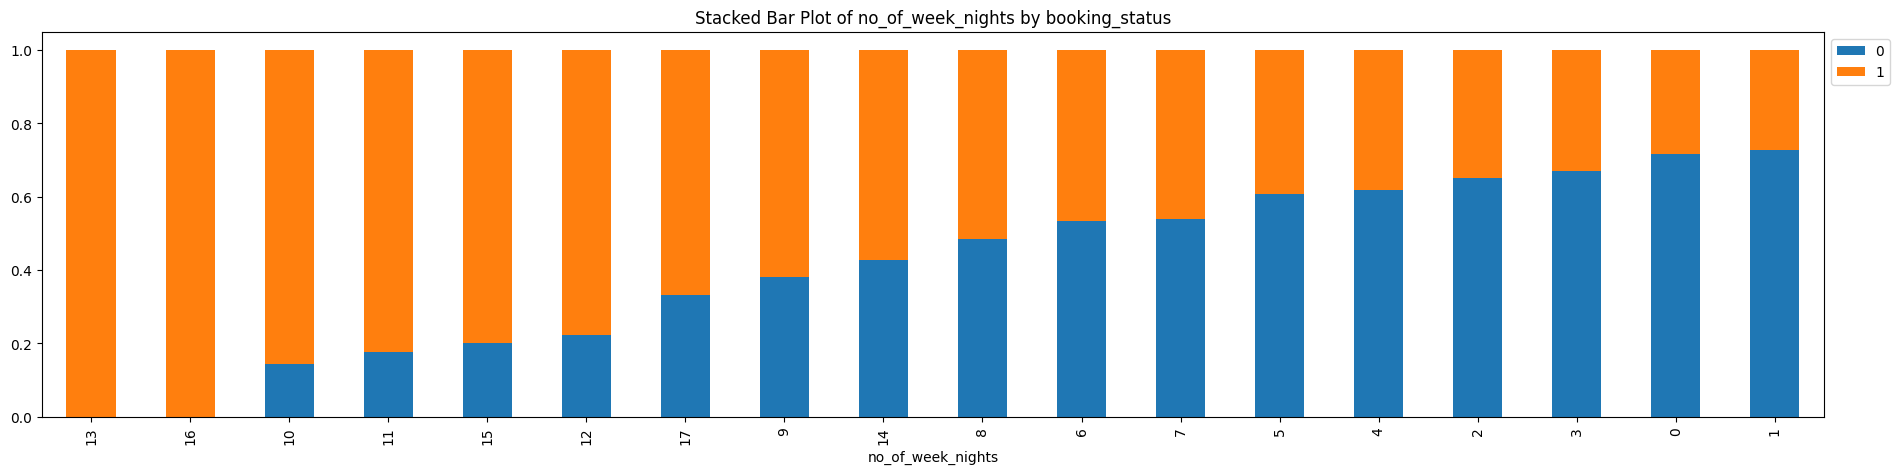

In [49]:
stacked_barplot(hotel, 'no_of_week_nights', 'booking_status')

* Longer stays are highly associated with cancellations
* Shorter stays have higher chances of being honored , showing an inverse relationship between length of stay and booking success
* This makes no_of_week_nights a strong predictor for cancellation risk

**No fo weekend nights vs booking status**

booking_status            0      1    All
no_of_weekend_nights                     
All                   24390  11885  36275
0                     11779   5093  16872
1                      6563   3432   9995
2                      5914   3157   9071
4                        46     83    129
3                        79     74    153
5                         5     29     34
6                         4     16     20
7                         0      1      1
------------------------------------------------------------------------------------------------------------------------


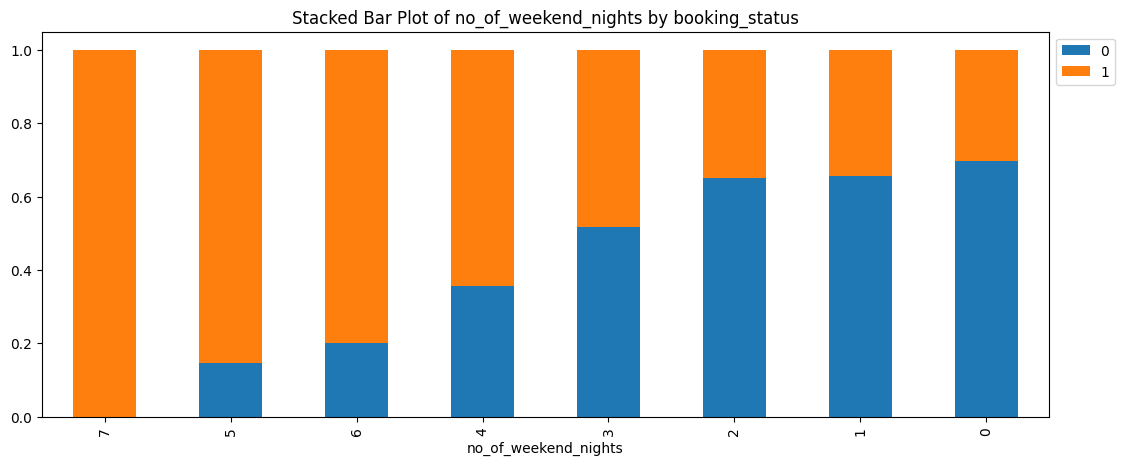

In [50]:
stacked_barplot(hotel, 'no_of_weekend_nights', 'booking_status')

* Longer weekend stays are mostly cancellations
* Bookings with 0–2 weekend nights have higher success rates , suggesting shorter weekend stays are more reliable
* no_of_weekend_nights is a useful feature for identifying cancellation risk in predictive modeling

**Type of meal plan vs booking status**

booking_status         0      1    All
type_of_meal_plan                     
All                24390  11885  36275
Meal Plan 1        19156   8679  27835
Not Selected        3431   1699   5130
Meal Plan 2         1799   1506   3305
Meal Plan 3            4      1      5
------------------------------------------------------------------------------------------------------------------------


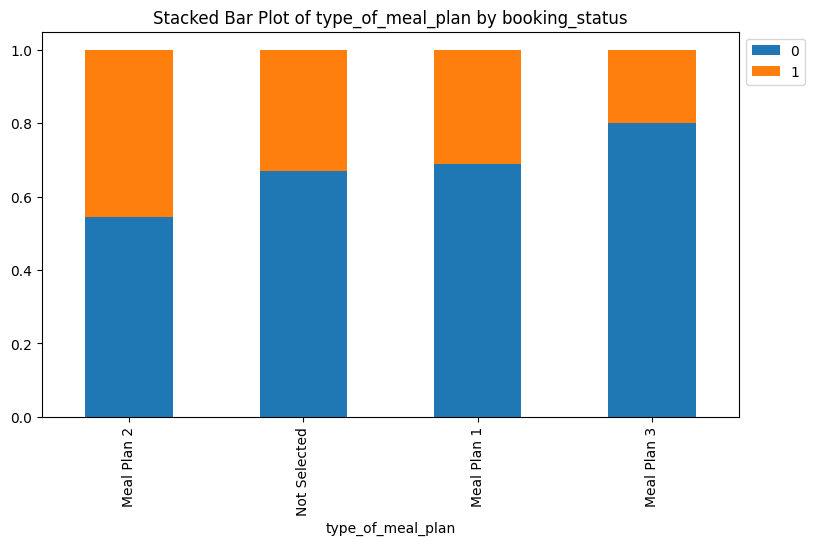

In [51]:
stacked_barplot(hotel, 'type_of_meal_plan', 'booking_status')

* Meal Plan 3 has the lowest cancellation rate, with the majority of bookings honored
* Meal Plan 2 has the highest cancellations, indicating it may be less attractive or linked to unreliable bookings
* Bookings with Meal Plan 1 or Not Selected fall in the middle, showing moderate cancellation patterns
* This suggests that type_of_meal_plan can serve as a categorical predictor for cancellation likelihood

**Required car parking space vs booking status**

booking_status                  0      1    All
required_car_parking_space                     
All                         24390  11885  36275
0                           23380  11771  35151
1                            1010    114   1124
------------------------------------------------------------------------------------------------------------------------


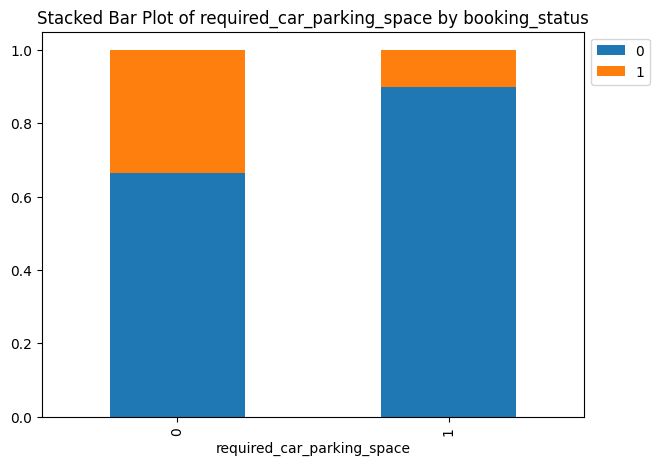

In [52]:
stacked_barplot(hotel, 'required_car_parking_space', 'booking_status')

* Guests who require a car parking space have a much lower cancellation rate, with most bookings honored
* Those who do not require parking show higher cancellations, making this feature a potential predictor of booking reliability

**Room type reserved vs booking status**

booking_status          0      1    All
room_type_reserved                     
All                 24390  11885  36275
Room_Type 1         19058   9072  28130
Room_Type 4          3988   2069   6057
Room_Type 6           560    406    966
Room_Type 2           464    228    692
Room_Type 5           193     72    265
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


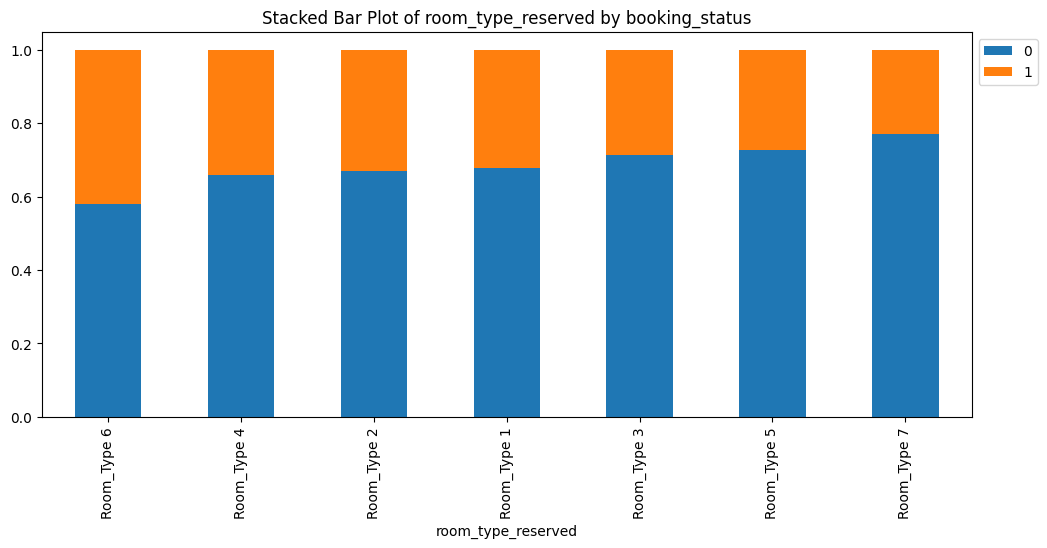

In [53]:
stacked_barplot(hotel, 'room_type_reserved', 'booking_status')

* There are variation in cancellation rates across room types, with Room_Type 6 having the highest cancellations
* Room_Types 3, 5, and 7 have higher booking success rates, indicating more reliability
* This means room_type_reserved is a useful categorical feature to capture differences in booking behavior

**Arrival year vs booking status**

booking_status      0      1    All
arrival_year                       
All             24390  11885  36275
2018            18837  10924  29761
2017             5553    961   6514
------------------------------------------------------------------------------------------------------------------------


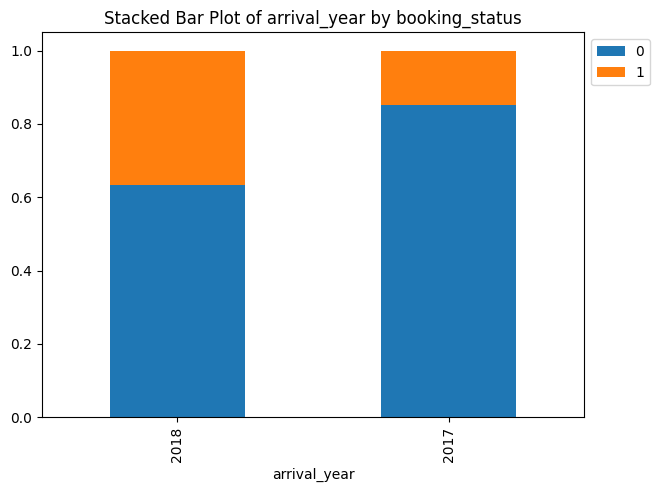

In [54]:
stacked_barplot(hotel, 'arrival_year', 'booking_status')

* Bookings in 2018 show a much higher cancellation rate compared to 2017


**Arrival month vs booking status**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


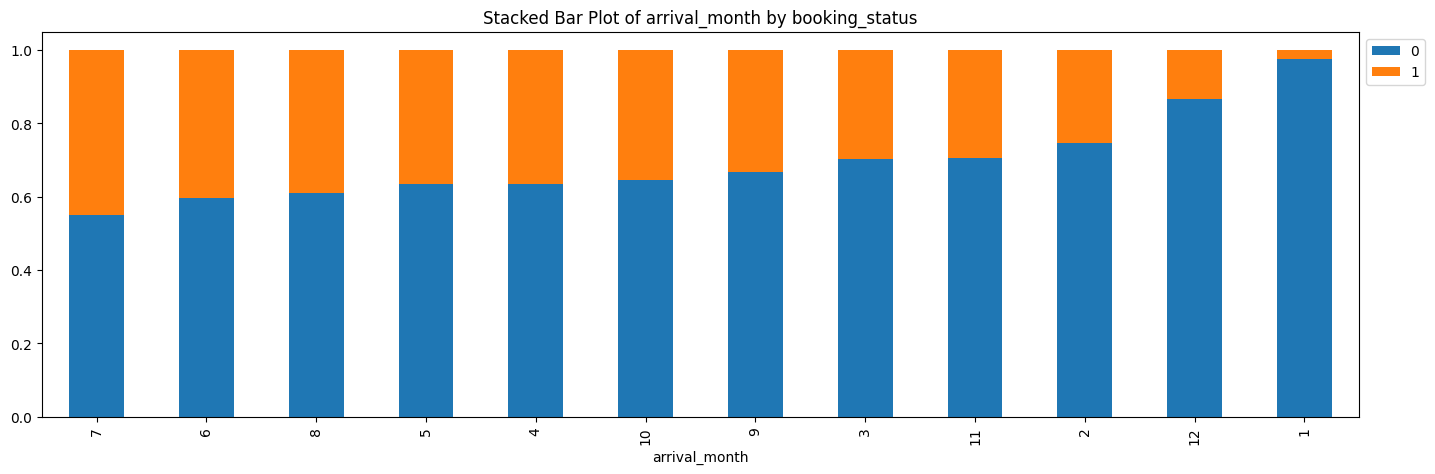

In [55]:
stacked_barplot(hotel, 'arrival_month', 'booking_status')

* Mid-year months have the highest cancellation rates
* Early-year months show the lowest cancellations, with most bookings honored
* The cancellation trend gradually decreases from mid-year towards year-end, especially in December and January
* This highlights arrival_month can be considered as a feature for predicting booking status

**Arrival date vs booking status**

booking_status      0      1    All
arrival_date                       
All             24390  11885  36275
15                735    538   1273
4                 853    474   1327
16                833    473   1306
30                751    465   1216
1                 668    465   1133
12                744    460   1204
17                897    448   1345
6                 829    444   1273
26                721    425   1146
19                914    413   1327
20                868    413   1281
13                950    408   1358
28                724    405   1129
3                 695    403   1098
25                751    395   1146
21                782    376   1158
24                731    372   1103
18                894    366   1260
7                 746    364   1110
8                 842    356   1198
22                672    351   1023
23                649    341    990
29                856    334   1190
11                768    330   1098
5                 826    328

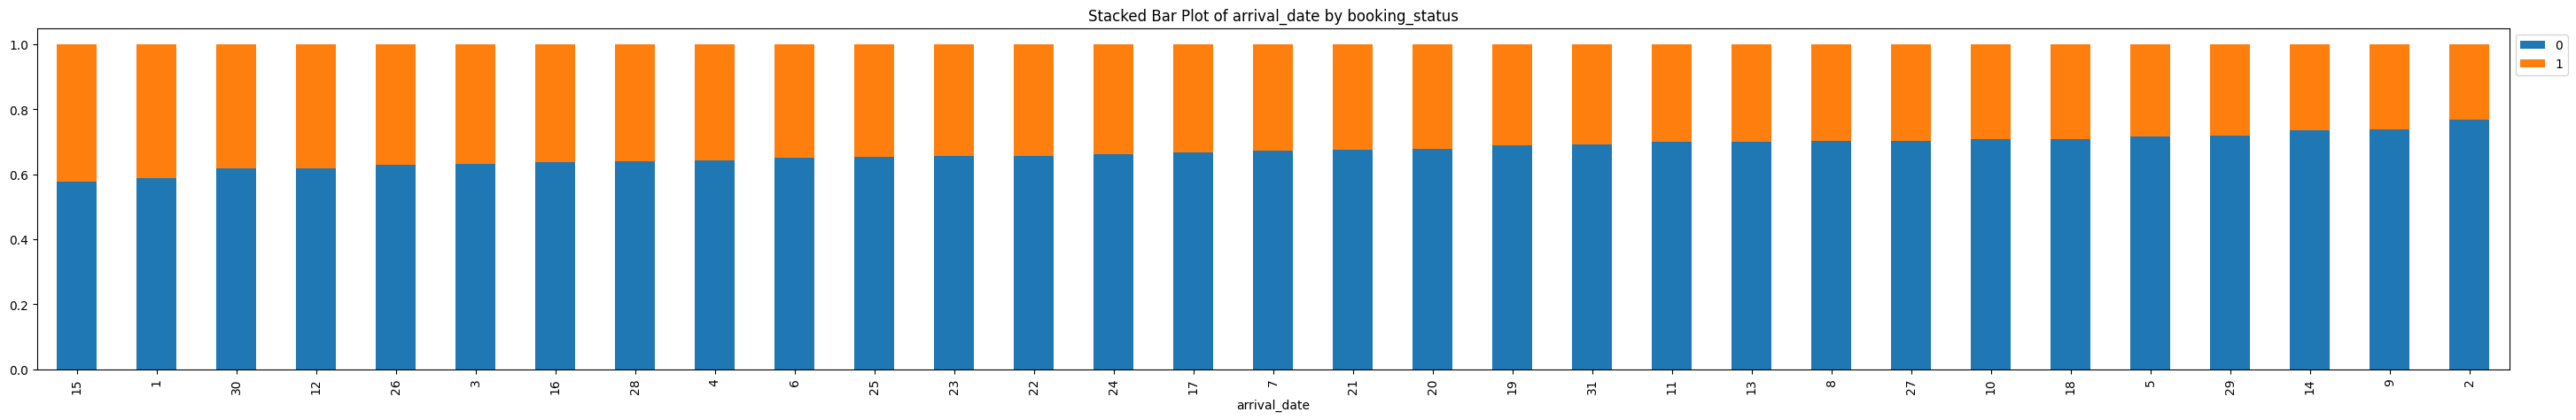

In [56]:
stacked_barplot(hotel, 'arrival_date', 'booking_status')

* Cancellation rates remain fairly consistent across arrival dates, with no strong peaks
* A slight trend indicates lower cancellations towards the end of the month, but the effect is minimal
* Overall, arrival_date appears to be a weak predictor of booking status compared to  month or year

**MArket segment type vs booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


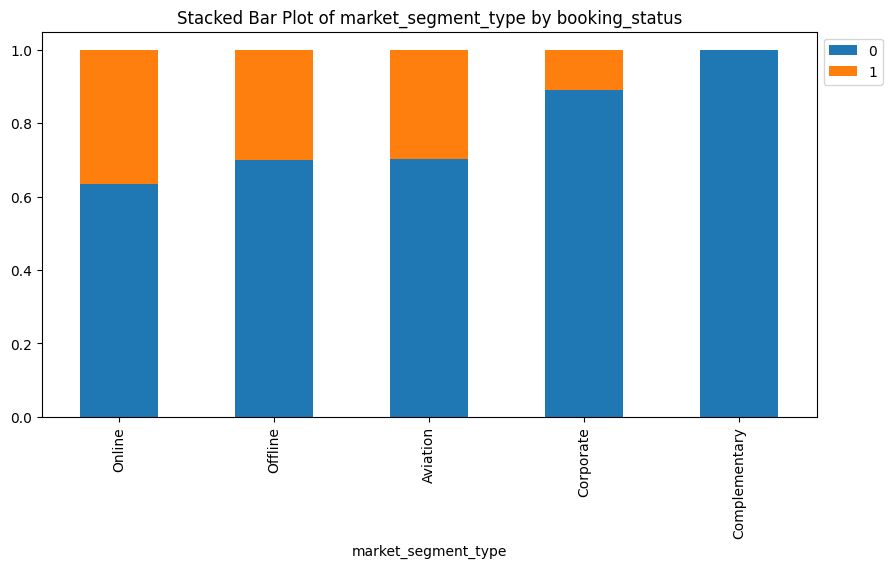

In [57]:
stacked_barplot(hotel, 'market_segment_type', 'booking_status')

* Online bookings show the highest cancellations, while offline and aviation bookings have moderate rates
* Corporate and complementary segments have the lowest cancellations, with most bookings honored
* This makes market_segment_type a key categorical predictor for modeling booking outcomes

**Repeated guest vs booking status**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


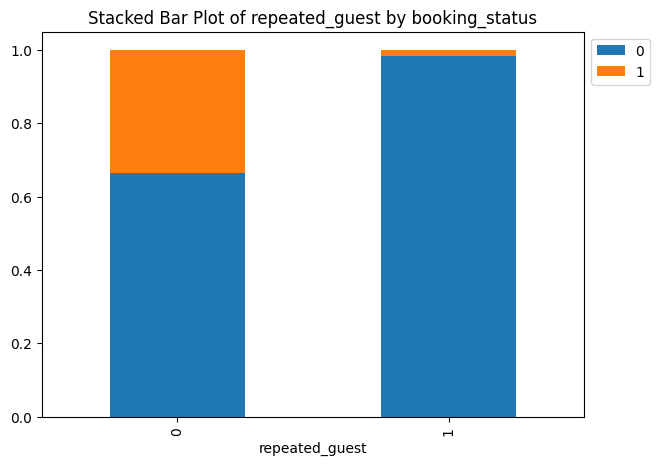

In [58]:
stacked_barplot(hotel, 'repeated_guest', 'booking_status')

* Repeated guests have extremely low cancellation rates, making them highly reliable customers
* First-time guests show much higher cancellations, indicating guest history can be another predictor of booking status

**No of previous cancellations vs booking status**

booking_status                    0      1    All
no_of_previous_cancellations                     
All                           24390  11885  36275
0                             24068  11869  35937
1                               187     11    198
13                                0      4      4
3                                42      1     43
2                                46      0     46
5                                11      0     11
4                                10      0     10
11                               25      0     25
6                                 1      0      1
------------------------------------------------------------------------------------------------------------------------


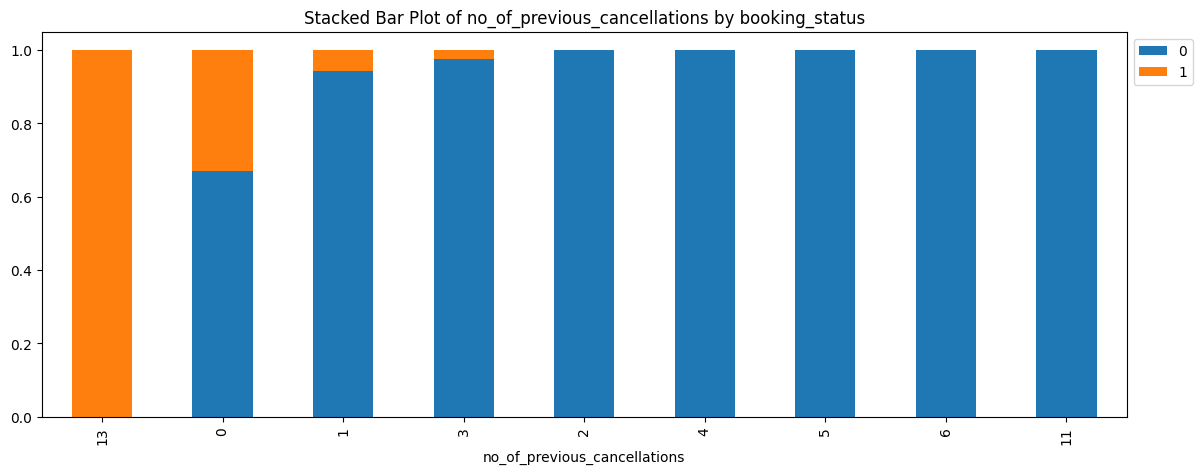

In [59]:
stacked_barplot(hotel, 'no_of_previous_cancellations', 'booking_status')

* Guests with a history of previous cancellations (especially 13) almost always cancel again
* Those with 0 previous cancellations still show moderate risk, but far less than those with hingh cancellation history
* This means no_of_previous_cancellations can be a predictor of future booking reliability

**No of previous bookings not cancelled vs booking status**

booking_status                            0      1    All
no_of_previous_bookings_not_canceled                     
All                                   24390  11885  36275
0                                     23585  11878  35463
1                                       224      4    228
6                                        35      1     36
12                                       11      1     12
4                                        64      1     65
5                                        60      0     60
3                                        80      0     80
8                                        23      0     23
9                                        19      0     19
10                                       19      0     19
2                                       112      0    112
11                                       15      0     15
13                                        7      0      7
14                                        9      0      9
15            

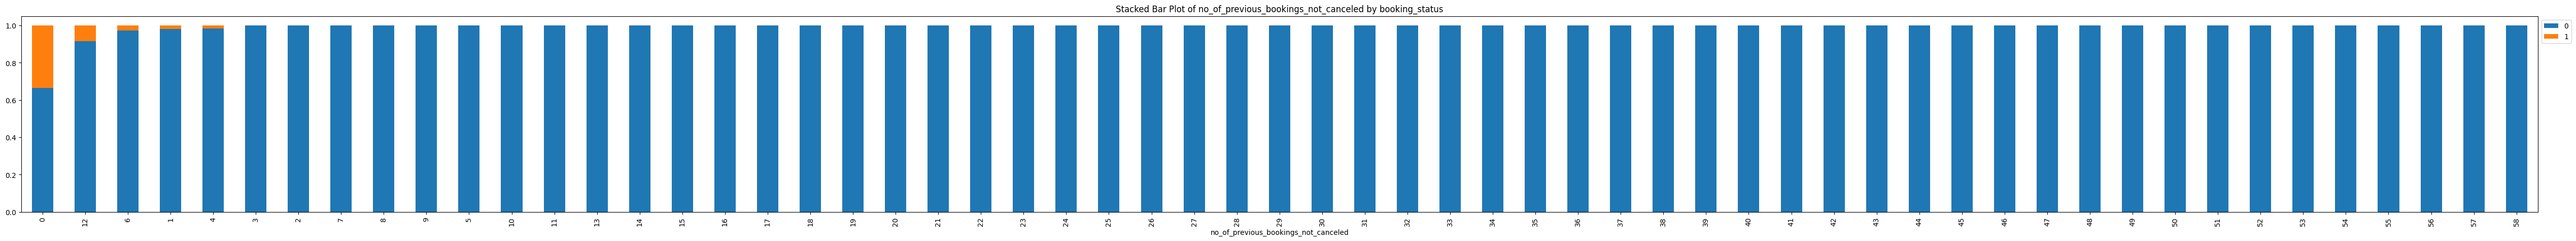

In [60]:
stacked_barplot(hotel, 'no_of_previous_bookings_not_canceled', 'booking_status')

* Guests with more previous successful bookings almost never cancel again, showing strong loyalty
* Cancellations are mostly concentrated among guests with prior successful bookings
* This makes no_of_previous_bookings_not_canceled a powerful stability indicator for predicting future booking behavior

**No fo special requests vs booking status**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


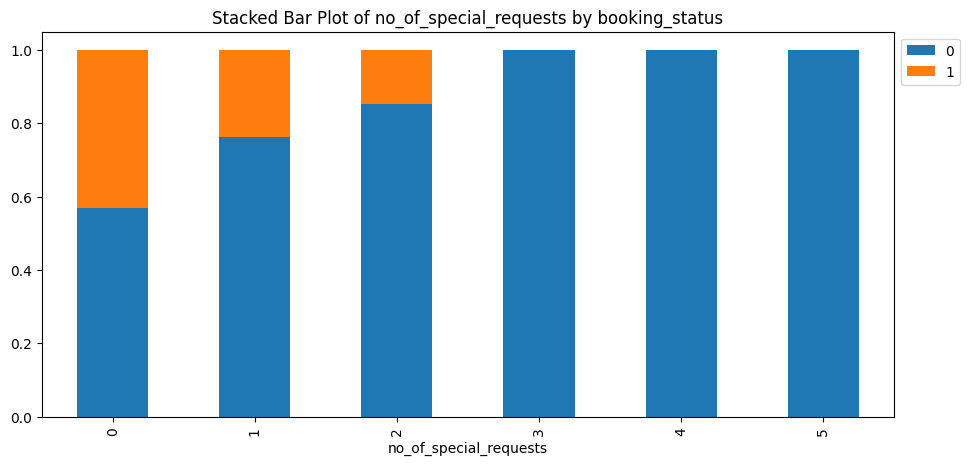

In [61]:
stacked_barplot(hotel, 'no_of_special_requests', 'booking_status')

* Guests with 0 special requests have the highest cancellations
* As the number of special requests increases, cancellations drop sharply, with 3 or more requests almost always honored
* This makes no_of_special_requests another possible predictor of booking reliability

**Average room prices vs market segments**

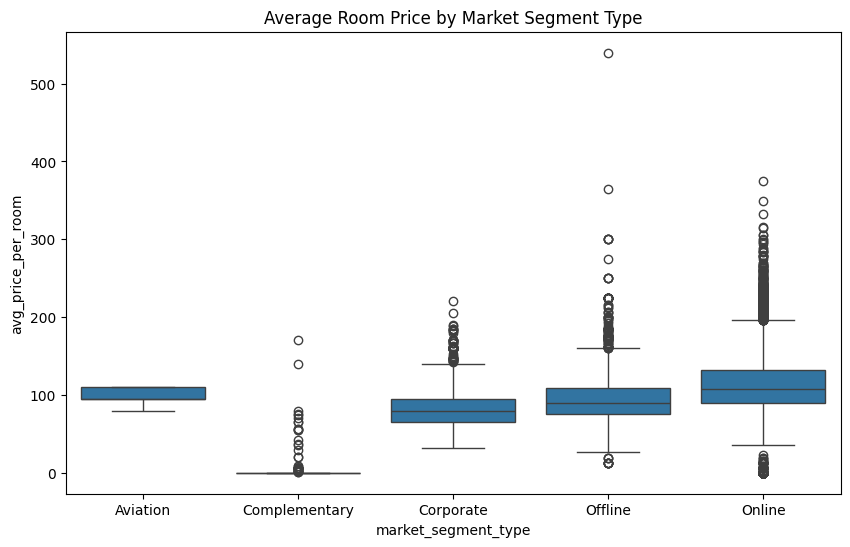

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=hotel, x='market_segment_type', y='avg_price_per_room',
)
plt.title('Average Room Price by Market Segment Type')
plt.show()

* **Aviation:** Prices are fairly consistent and stable, with little variation
* **Complementary:** Almost all values are near zero, reflecting free or heavily discounted stays
* **Corporate:** Moderate rates, generally lower than Online/Offline, but higher than Complementary
* **Offline:** Prices are higher and more spread out, with several extreme outliers
* **Online:** Rates are also high and widely spread, with many outliers, often higher than Offline

**no_of_special_requests vs avg_price_per_room**

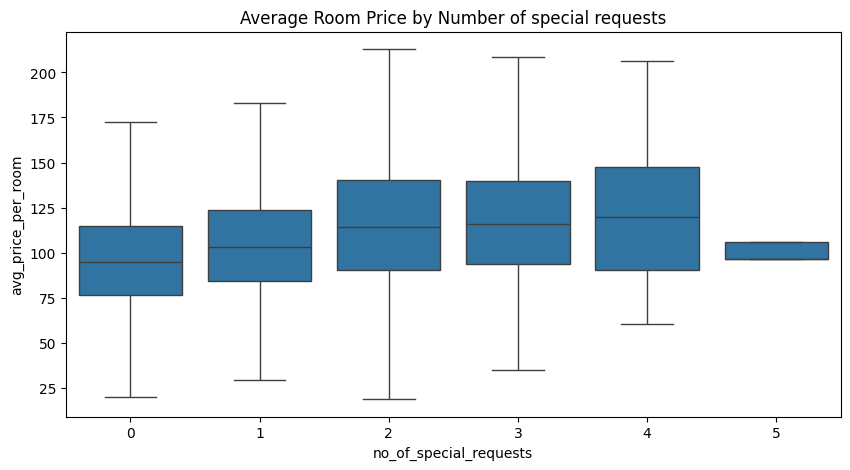

In [63]:
# A boxplot between no_of_special_requests and avg_price_per_room.
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=hotel,
    x="no_of_special_requests",
    y="avg_price_per_room",
    # turning off the outliers
    showfliers=False,
)
plt.title('Average Room Price by Number of special requests')
plt.show()

* Guests with more special requests tend to pay higher average room prices, showing a positive relationship
* The spread and outliers increase as requests rise, suggesting varied spending patterns for demanding guests
* Bookings with 0–1 requests are linked to lower prices, while 3+ requests are associated with higher pricing tiers

**Average price per room vs repeated guest**

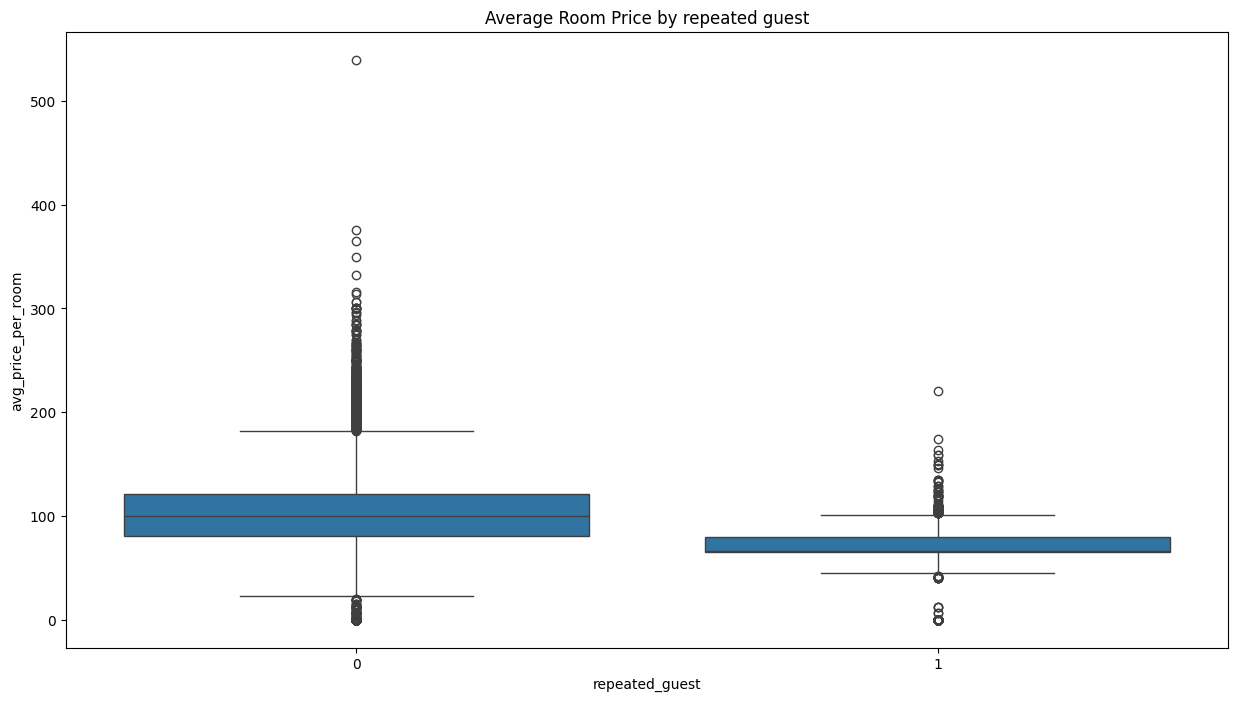

In [64]:
plt.figure(figsize = (15,8))
sns.boxplot(data=hotel, x='repeated_guest', y='avg_price_per_room')
plt.title('Average Room Price by repeated guest')
plt.show();

* First-time guests show a wider price range and more extreme outliers, indicating highly variable spending patterns
* Repeated guests pay more consistently, with lower median prices and fewer extreme outliers
* This suggests repeated guests are more predictable in pricing behavior, while new guests drive most variability

**Average Room Price vs Arrival month**

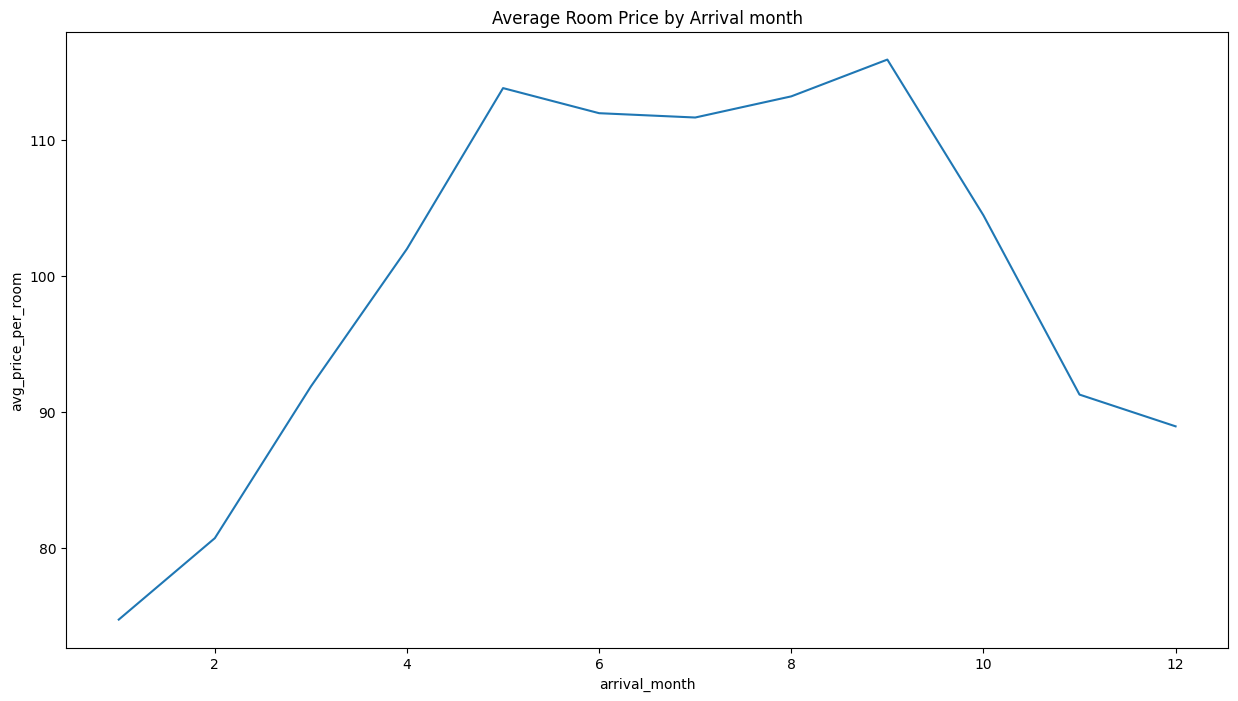

In [65]:
plt.figure(figsize = (15,8))
sns.lineplot(x=hotel["arrival_month"],y=hotel["avg_price_per_room"],  ci=None);
plt.title('Average Room Price by Arrival month')
plt.show();



* Room prices vary by arrival month, with peaks around mid-year (May–September), reflecting seasonal demand
* The spread and number of outliers increase in peak months, showing greater price variability
* Early (Jan–Feb) and late-year (Nov–Dec) months have lower medians and narrower ranges, indicating off-season stability
* This confirms seasonality as a strong driver of price fluctuations in bookings

**Average Room Price by room type**

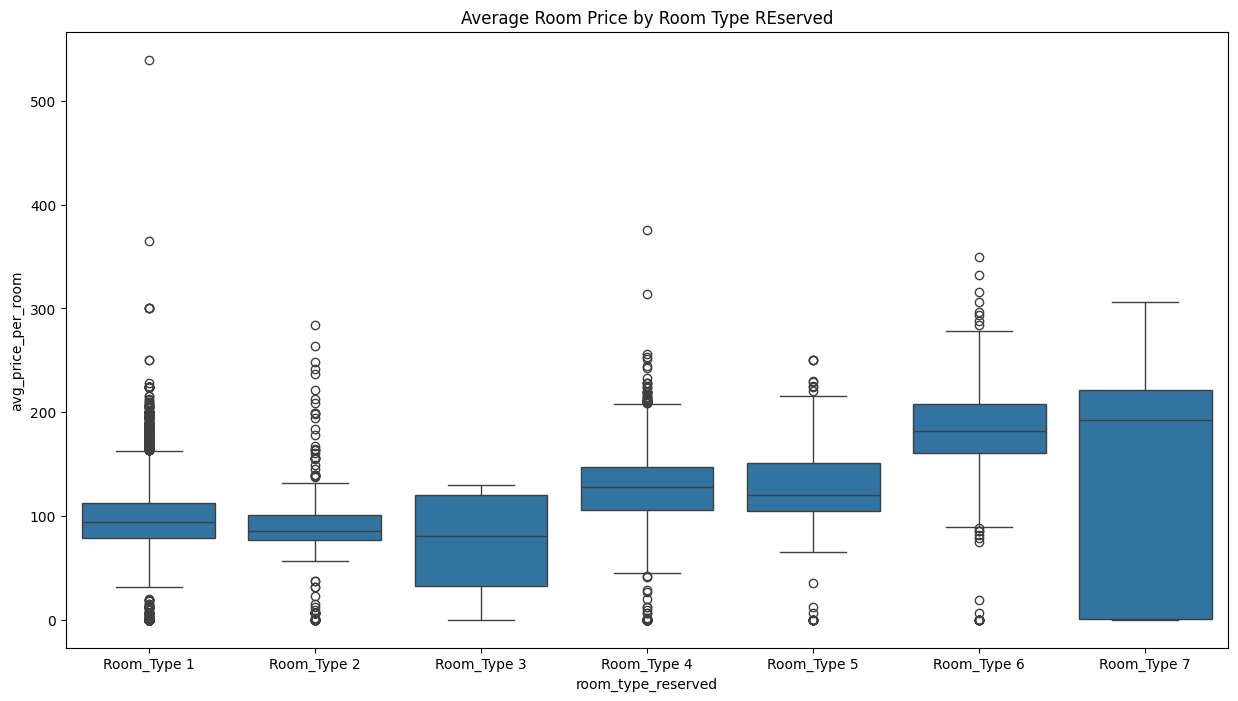

In [66]:
plt.figure(figsize = (15,8))
sns.boxplot(data=hotel, x='room_type_reserved', y='avg_price_per_room')
plt.title('Average Room Price by Room Type REserved')
plt.show();

* Room_Type 1–3 have lower median prices, with Room_Type 3 showing the widest variability and low outliers
* Room_Types 4–7 are higher priced, with medians increasing steadily, especially for Room_Type 6 and 7
* Price variability and outliers rise with premium room types, indicating greater inconsistency at higher tiers
* This confirms that room_type_reserved is a key driver of price differentiation in the dataset

**Average Room Price by Meal plan type**

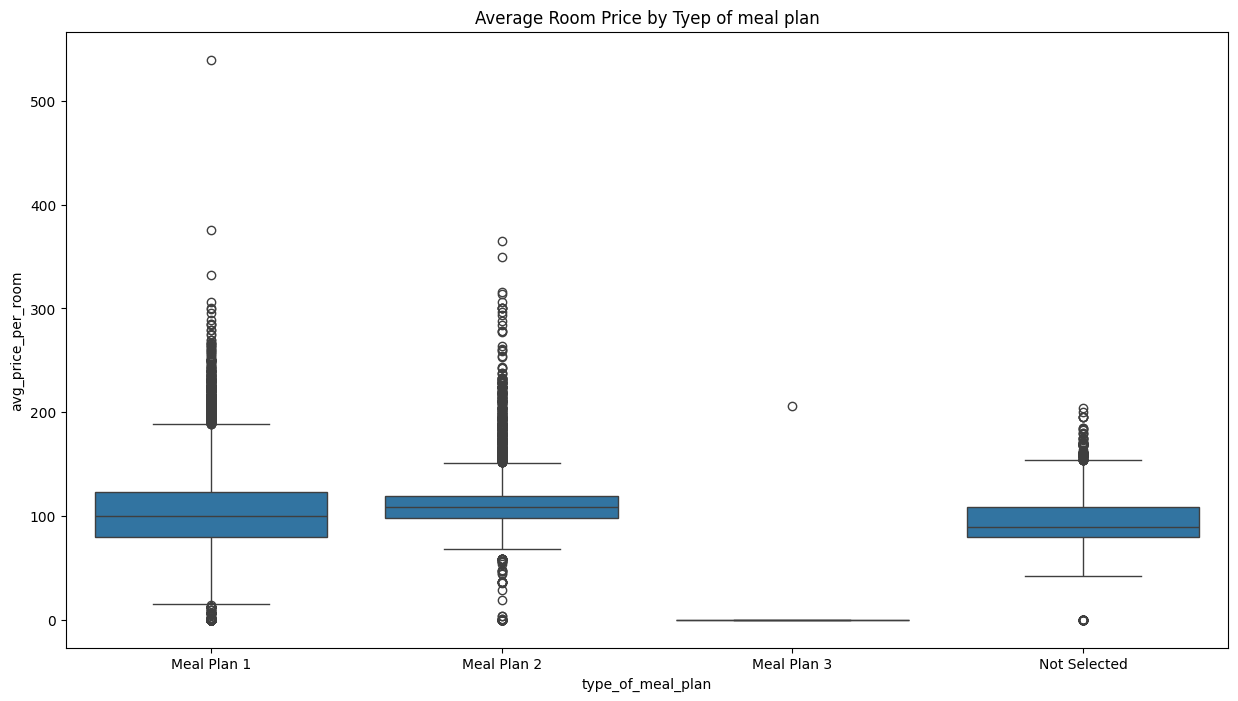

In [67]:
plt.figure(figsize = (15,8))
sns.boxplot(data=hotel, x='type_of_meal_plan', y='avg_price_per_room')
plt.title('Average Room Price by Tyep of meal plan')
plt.show();

* Meal Plan 1 and 2 dominate with similar average price ranges, though Meal Plan 2 has slightly higher medians
* Meal Plan 3 shows almost flat pricing, likely representing a fixed or bundled offering
* Guests with no meal plan selected have lower and more stable prices compared to those choosing plans
* This indicates that type_of_meal_plan plays a role in pricing segmentation and customer preferences

**Repeating customers who cancel**

In [68]:
hotel.groupby("repeated_guest")["booking_status"].value_counts(normalize=True)

repeated_guest  booking_status
0               0                 0.664196
                1                 0.335804
1               0                 0.982796
                1                 0.017204
Name: proportion, dtype: float64

* The percentage of repeating guests who cancelled the booking is 1.7%
* Non-repeating guests tend to cancel more (standing at 33.5%)

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Missing value treatment**

In [69]:
hotel.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


* There are no missing values

**Outlier detection and treatment (if needed)**

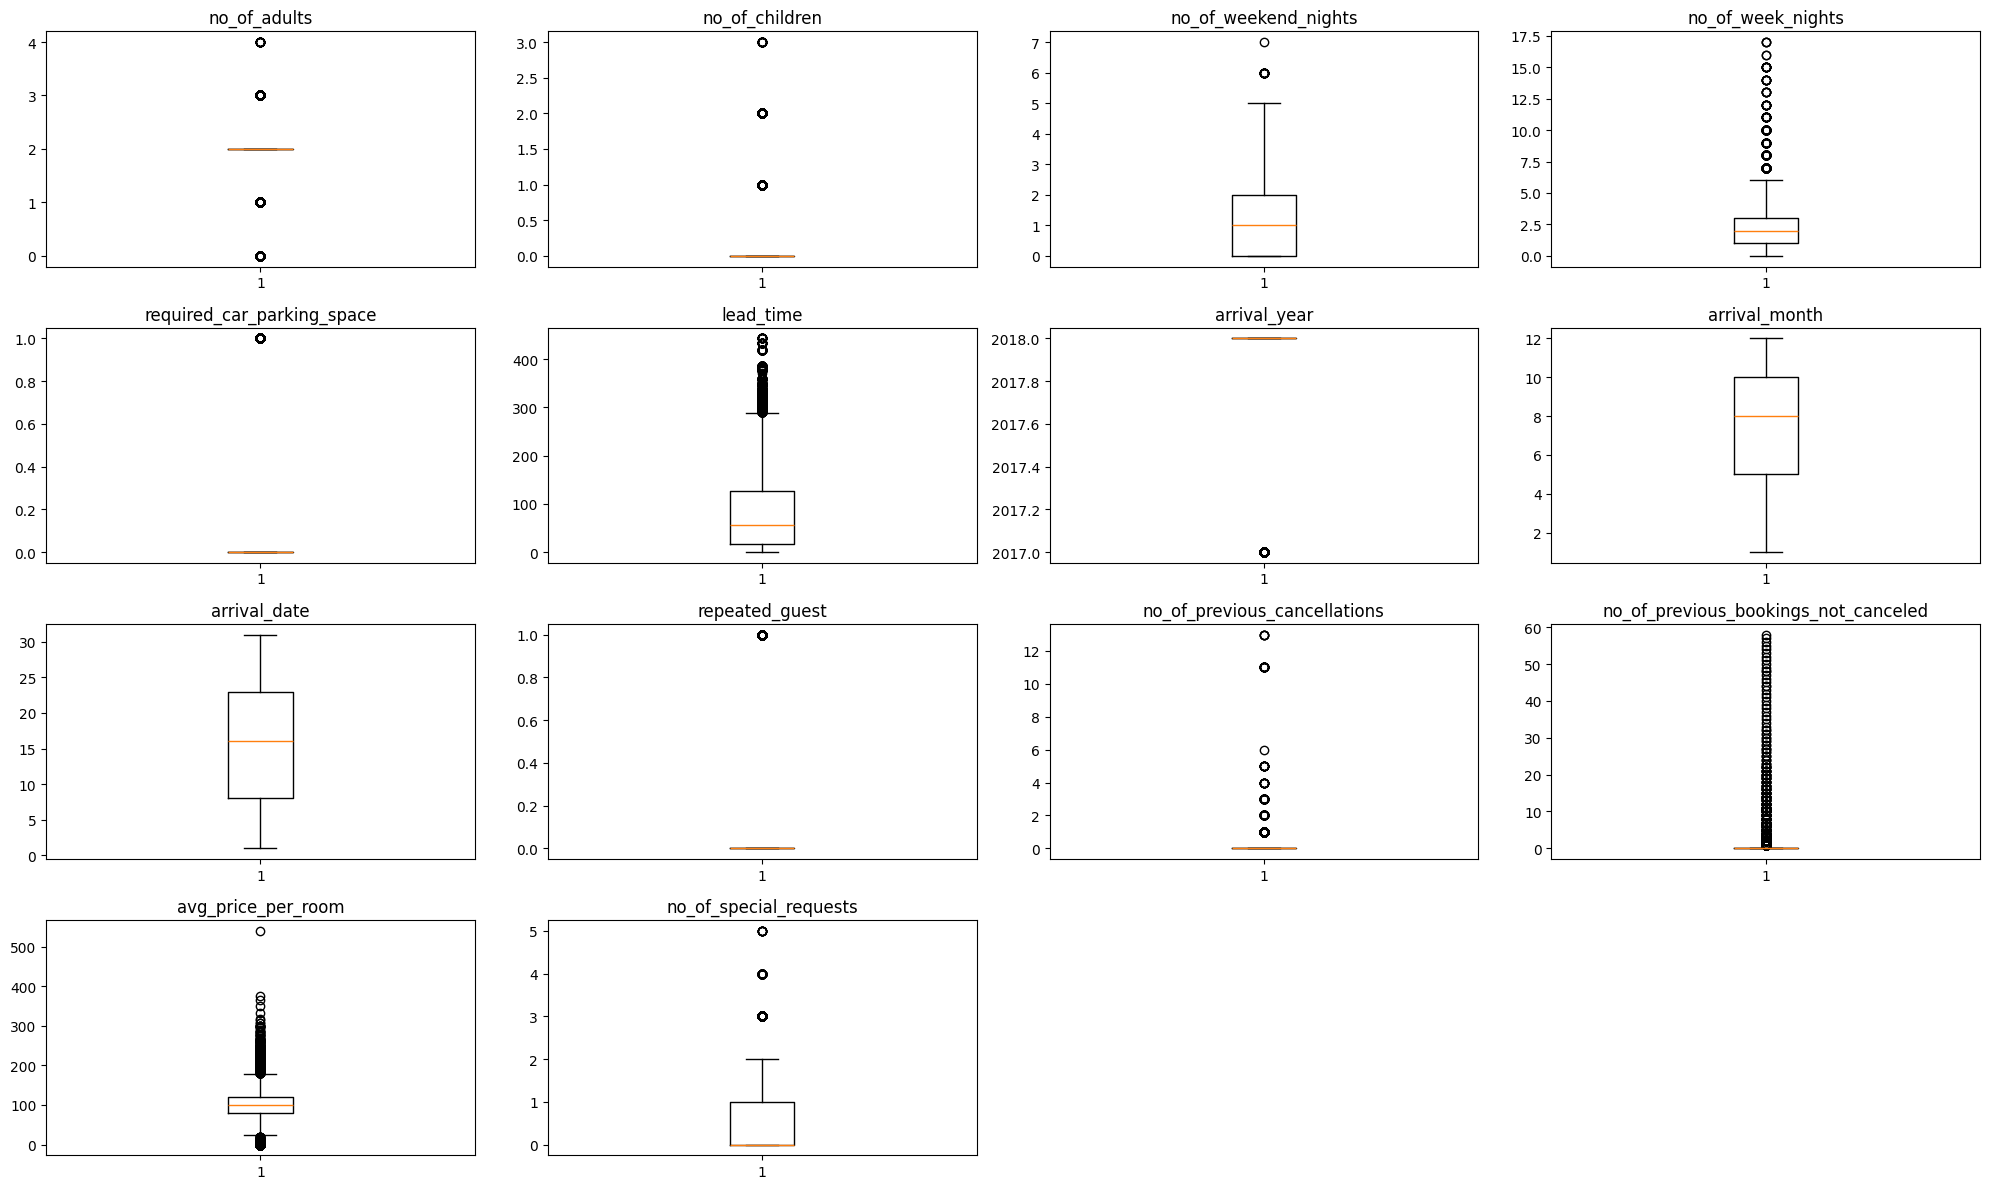

In [70]:
# outlier detection using boxplot

# Select all numeric variables from the dataset
num_cols = hotel.select_dtypes(include=np.number).columns.tolist()

# dropping booking_status as it is target variable
num_cols.remove("booking_status")

plt.figure(figsize=(20, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(hotel[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* We will continue with the outliers as their presence does not affect the output of the model

**Preparing data for modeling**

In [71]:
#  Defining the independent and dependent variables
X = hotel.drop(['booking_status'], axis=1)
y = hotel['booking_status']

In [72]:
# Normalizing the numerical variables
num_columns = X.select_dtypes(include=[np.number]).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(X[num_columns])

# Transform selected columns in X using the fitted scaler
X[num_columns] = scaler.transform(X[num_columns])

In [73]:
#  Complete the code to one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.298893,-0.265435,0.217401,-0.144803,-0.178819,1.614896,-2.137469,0.839242,-1.555662,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.298893,-0.265435,1.365993,0.563972,-0.178819,-0.933701,0.467843,1.164990,-1.098013,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.628975,-0.265435,1.365993,-0.853578,-0.178819,-0.980250,0.467843,-1.766747,1.419055,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.298893,-0.265435,-0.931190,-0.144803,-0.178819,1.463610,0.467843,-0.789501,0.503757,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.298893,-0.265435,0.217401,-0.853578,-0.178819,-0.433291,0.467843,-1.115250,-0.525952,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)    # stratify ensures that the training and test sets have a similar distribution of the response variable

In [75]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29020, 27)
Shape of test set :  (7255, 27)
Percentage of classes in training set:
booking_status
0    0.672364
1    0.327636
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.672364
1    0.327636
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as follows:**
1.   Predicting a booking will not be canceled when in reality the booking gets canceled [ False Negative ]
2.   Predicting a booking will be canceled but in reality booking does not get canceled. [False Positive]

**Which case is more important?**
  * Both the cases are important as:
    * False Negative (predict not canceled but actually canceled): Hotel loses revenue, spends on advertising, and may cut prices to resell quickly
    * False Positive (predict canceled but actually not): Guests may face last-minute issues, poor service, and dissatisfaction, leading to bad reviews, lost loyalty, and brand damage

**How to reduce this loss?**
* The **F1 score** should be maximized, as a higher F1 indicates a better balance between precision and recall, effectively reducing both false positives and false negatives, and improving the overall accuracy in identifying both classes

    




    

    


In [76]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [77]:
# defining a function to plot the confusion_matrix of a classification model

def plot_confusion_matrix(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    y_pred = np.round(pred_temp)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### K-Nearest Neighbor

In [78]:
# instantiate learning model (k = 3)
knn_0 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_0.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

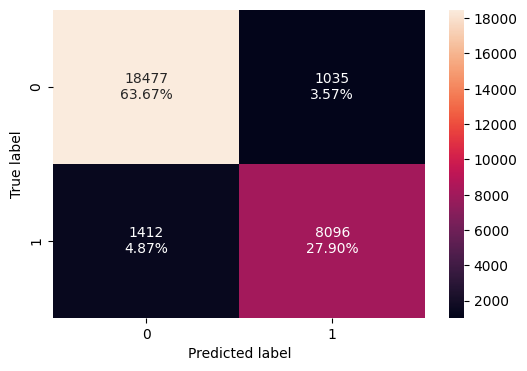

In [79]:
# Creating a confusion matrix for train data
plot_confusion_matrix(knn_0, X_train, y_train)

In [80]:
# checking performance on train data
knn_0_perf_train = model_performance_classification(knn_0, X_train, y_train)
knn_0_perf_train

,Accuracy,Recall,Precision,F1
0,0.915679,0.851493,0.88665,0.868716


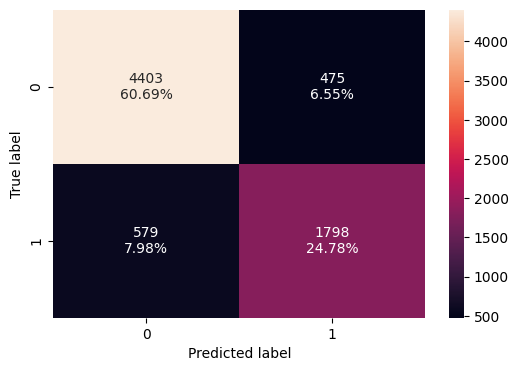

In [81]:
#creating a confusion matrix for test data
plot_confusion_matrix(knn_0, X_test, y_test)

In [82]:
# checking performance on test data
knn_0_perf_test = model_performance_classification(knn_0, X_test, y_test)
knn_0_perf_test

,Accuracy,Recall,Precision,F1
0,0.854721,0.756416,0.791025,0.773333


* High train score but lower test score suggesting overfitting

###Naive Bayes

In [83]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

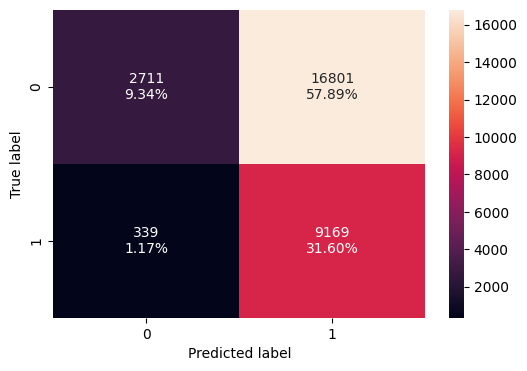

In [84]:
# create confusion matrix for train data
plot_confusion_matrix(nb, X_train, y_train)

In [85]:
# check performance on train data
nb_perf_train = model_performance_classification(nb, X_train, y_train)
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.409373,0.964346,0.353061,0.516884


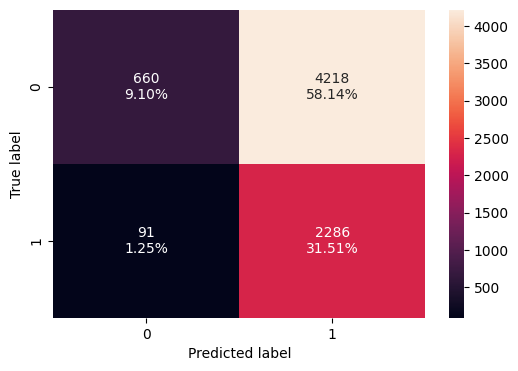

In [86]:
# create a confusion matrix for test data
plot_confusion_matrix(nb, X_test, y_test)

In [87]:
# check performance on test data
nb_perf_test = model_performance_classification(nb, X_test, y_test)
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.406065,0.961716,0.351476,0.514807


* Very low F1 scores suggesting poor performance

### Support Vector Machine

**SVM with a linear kernel**

In [88]:
# fitting SVM model
svm_0 = SVC(kernel='linear', probability=True)
svm_0.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

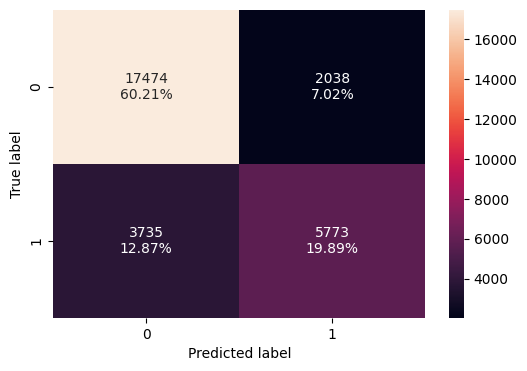

In [89]:
# Creating a confusion matrix for train data
plot_confusion_matrix(model=svm_0, predictors= X_train, target=y_train)

In [90]:
# Checking performance on train data
print("Training performance:")
svm_0_perf_train = model_performance_classification(svm_0, X_train, y_train)
svm_0_perf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.801068,0.607173,0.739086,0.666667


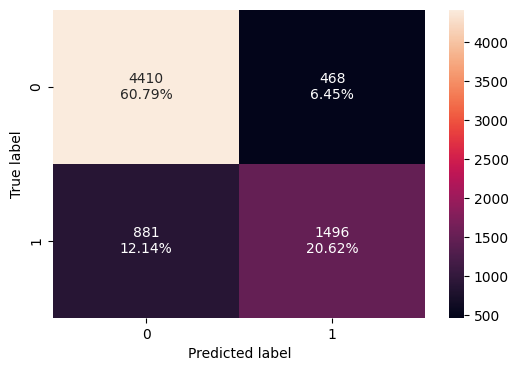

In [91]:
# Creating a confusion matrix for test data
plot_confusion_matrix(model=svm_0, predictors= X_test, target=y_test)

In [92]:
## Checking performance on test data
print("Test performance:")
svm_0_perf_test = model_performance_classification(svm_0, X_test, y_test)
svm_0_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.814059,0.629365,0.761711,0.689242


* Moderate scores, but lower than SVM-RBF hence less expressive for non-linear patterns

## Model Performance Improvement

Tune the models built in the Model Building section

### **K-Nearest Neighbor - Different values of K**

In [93]:
# creating a list of odd values of K for KNN
neighbors = [i for i in range(3, 20) if i % 2 != 0]

# empty list that will hold F1 scores
f1_scores_train = []
f1_scores_test = []

# perform F1 metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate F1 on train and test
    score_train = f1_score(y_train, y_pred_train)
    f1_scores_train.append(score_train)
    score_test = f1_score(y_test, y_pred_test)
    f1_scores_test.append(score_test)

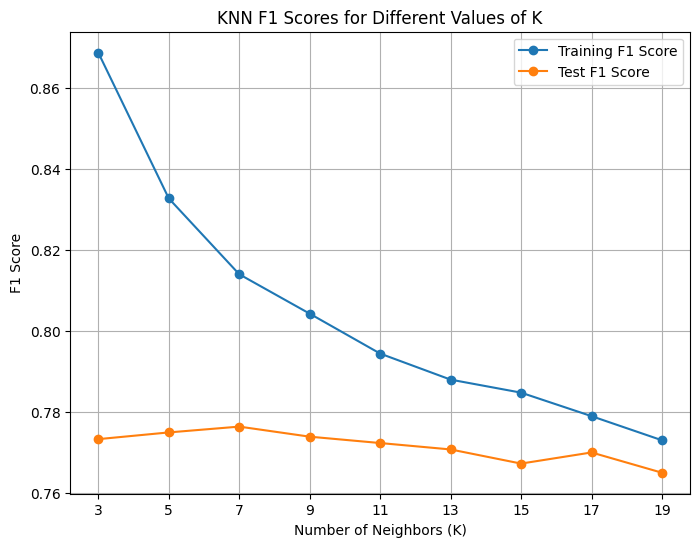

In [94]:
# Plot F1 scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, f1_scores_train, label='Training F1 Score', marker='o')
plt.plot(neighbors, f1_scores_test, label='Test F1 Score', marker='o')
plt.title('KNN F1 Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('F1 Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

* As K increases, training F1 decreases while test F1 peaks around K=7, showing the best generalization at this point
* At K=7, the model achieves the highest test F1 score with a good balance between bias and variance, avoiding overfitting seen at lower K values and underfitting at higher K values



In [95]:
# instantiate learning model (k = 7)
knn_1 = KNeighborsClassifier(n_neighbors = 7)
# fitting the model
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

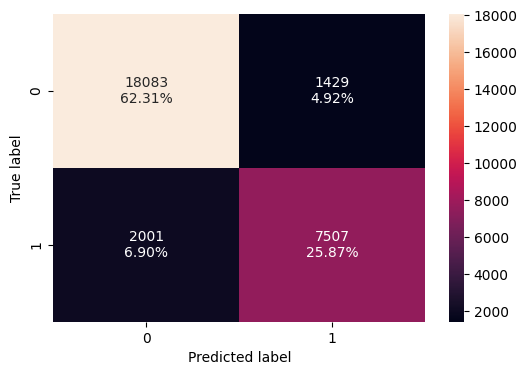

In [96]:
# Create confusion matrix for train data
plot_confusion_matrix(knn_1, X_train, y_train)

In [97]:
# checking performance on train data
print('Training perfomance: ')
knn_1_perf_train = model_performance_classification(knn_1, X_train, y_train)
knn_1_perf_train

Training perfomance: 


,Accuracy,Recall,Precision,F1
0,0.881806,0.789546,0.840085,0.814032


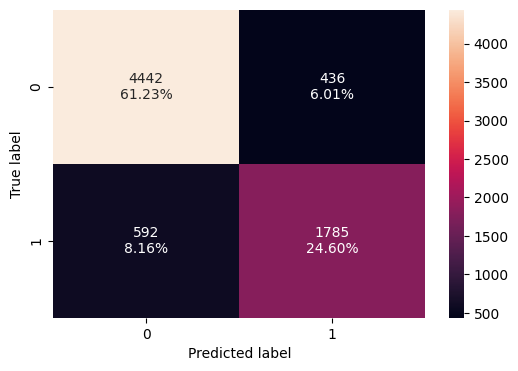

In [98]:
# Creating a confusion matrix for test data
plot_confusion_matrix(knn_1, X_test, y_test)

In [99]:
# Checking performance on test data
print('Test perfomance: ')
knn_1_perf_test = model_performance_classification(knn_1, X_test, y_test)
knn_1_perf_test

Test perfomance: 


,Accuracy,Recall,Precision,F1
0,0.858305,0.750947,0.803692,0.776425


* Lightly better generalization than K=3, but higher variation between train and test score

### Support Vector Machine - Changing Parameters (atleast 6 combinations)

**Support Vector Machine (Kernel = "Polynomial" , Degree = 2 )**

In [100]:
# fitting SVM model
svm_1 = SVC(kernel='poly', degree=2, probability=True)
svm_1.fit(X_train,y_train)

SVC(degree=2, kernel='poly', probability=True)

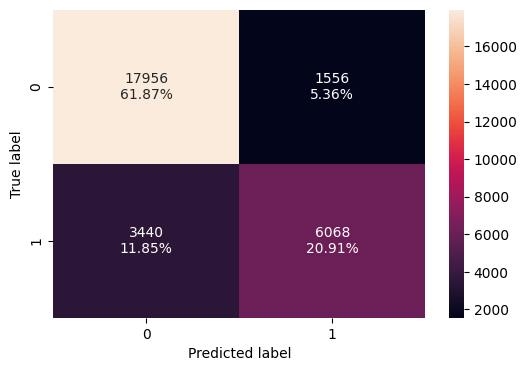

In [101]:
# Creating a confusion matrix for train data
plot_confusion_matrix(model=svm_1, predictors= X_train, target=y_train)

In [102]:
# checking performance on train data
print("Training performance:")
svm_1_perf_train = model_performance_classification(svm_1, X_train, y_train)
svm_1_perf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.827843,0.638199,0.795908,0.708382


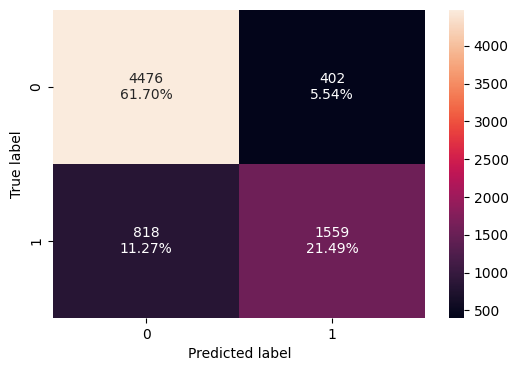

In [103]:
# creating a confusion matrix for test data
plot_confusion_matrix(model=svm_1, predictors= X_test, target=y_test)

In [104]:
# checking performance on test data
print("Test performance:")
svm_1_perf_test = model_performance_classification(svm_1, X_test, y_test)
svm_1_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.83184,0.655869,0.795003,0.718764


* Better than linear, but still lower test score than RBF

**Support Vector Machine (Kernel = "Polynomial", Degree = 2, Gamma = 0.016)**

In [105]:
# fitting SVM model
svm_2 = SVC(kernel='poly', degree=2, gamma=0.016, probability=True)
svm_2.fit(X_train,y_train)

SVC(degree=2, gamma=0.016, kernel='poly', probability=True)

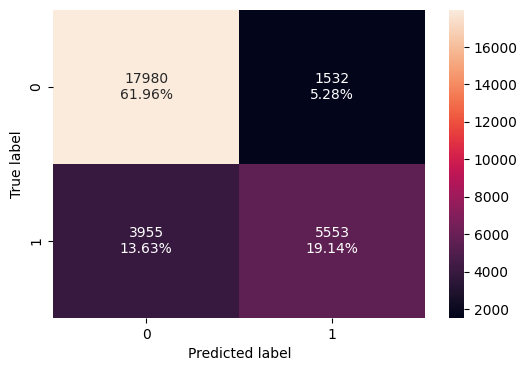

In [106]:
# creating a confusion matrix for train data
plot_confusion_matrix(model=svm_2, predictors= X_train, target=y_train)

In [107]:
# checking performance on train data
print("Training performance:")
svm_2_perf_train = model_performance_classification(svm_2, X_train, y_train)
svm_2_perf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.810924,0.584034,0.783769,0.669318


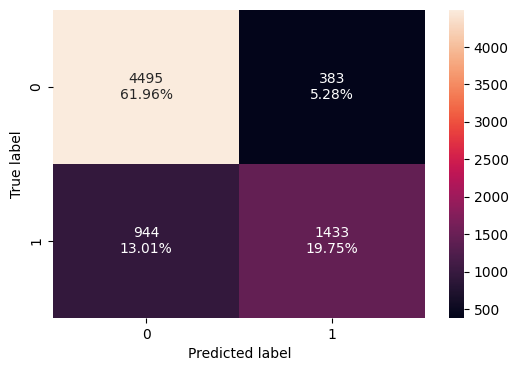

In [108]:
# creating a confusion matrix for test data
plot_confusion_matrix(model=svm_2, predictors= X_test, target=y_test)

In [109]:
# checking performance on test data
print("Test performance:")
svm_2_perf_test = model_performance_classification(svm_2, X_test, y_test)
svm_2_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.817092,0.602861,0.789097,0.68352


* Lower scores than default polynomial herefore htis tuning has no help to the dataset in quesiton

**Support Vector Machine (Kernel = "Polynomial", Degree = 2, Gamma = 0.016, C = 0.1)**

In [110]:
# fitting SVM model
svm_3 = SVC(kernel='poly', degree=2, gamma=0.016, C=0.1, probability=True)
svm_3.fit(X_train,y_train)

SVC(C=0.1, degree=2, gamma=0.016, kernel='poly', probability=True)

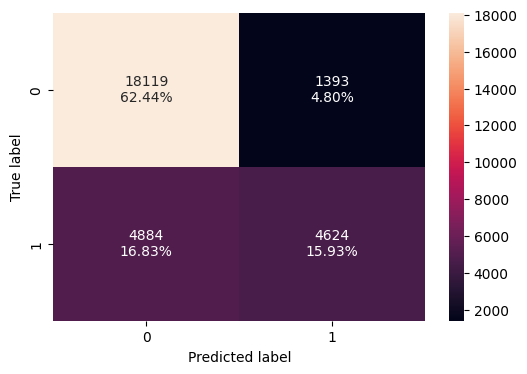

In [111]:
# creating a confusion matrix for train data
plot_confusion_matrix(model=svm_3, predictors= X_train, target=y_train)

In [112]:
# checking performance on train data
print("Training performance:")
svm_3_perf_train = model_performance_classification(svm_3, X_train, y_train)
svm_3_perf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.783701,0.486327,0.768489,0.595684


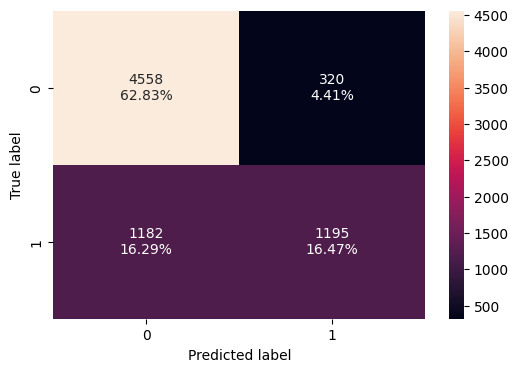

In [113]:
# creating a  confusion matrix for test data
plot_confusion_matrix(model=svm_3, predictors= X_test, target=y_test)

In [114]:
# checking performance on test data
print("Test performance:")
svm_3_perf_test = model_performance_classification(svm_3, X_test, y_test)
svm_3_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79297,0.502735,0.788779,0.61408


* Even worse performance suggesting underfitting due to low C

**Support Vector Machine (Kernel = "Polynomial" , Degree = 3 )**

*Increase the degree of the polynomial

In [115]:
# fitting SVM model
svm_4 = SVC(kernel='poly', degree=3, probability=True)
svm_4.fit(X_train,y_train)

SVC(kernel='poly', probability=True)

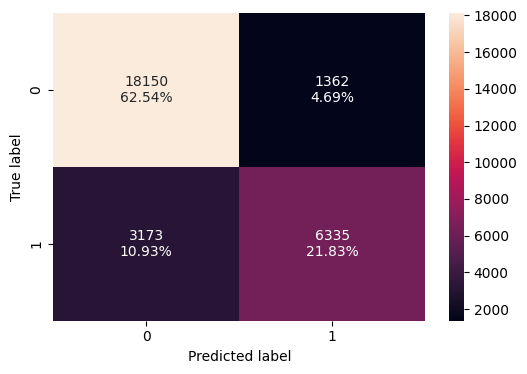

In [116]:
# creating a  confusion matrix for train data
plot_confusion_matrix(model=svm_4, predictors= X_train, target=y_train)

In [117]:
# checking performance on train data
print("Training performance:")
svm_4_perf_train = model_performance_classification(svm_4, X_train, y_train)
svm_4_perf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.843728,0.666281,0.823048,0.736414


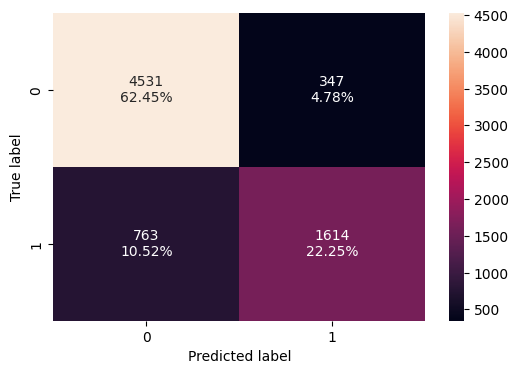

In [118]:
# creating a  confusion matrix for test data
plot_confusion_matrix(model=svm_4, predictors= X_test, target=y_test)

In [119]:
# checking performance on test data
print("Test performance:")
svm_4_perf_test = model_performance_classification(svm_4, X_test, y_test)
svm_4_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.847002,0.679007,0.823049,0.744122


* Decent scores, but still below RBF

**Support Vector Machine (Kernel = "Polynomial", Degree = 3, Gamma = 0.016)**

In [120]:
# fitting SVM model
svm_5 = SVC(kernel='poly', degree=3, gamma=0.016, probability=True)
svm_5.fit(X_train,y_train)

SVC(gamma=0.016, kernel='poly', probability=True)

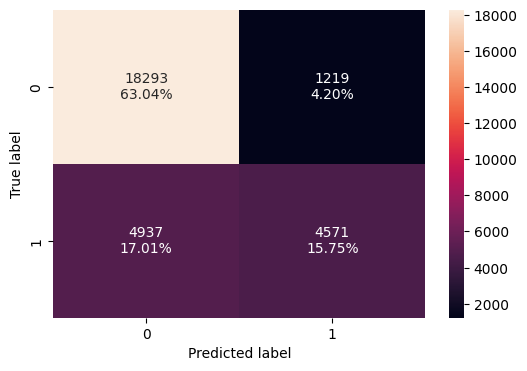

In [121]:
# creating a confusion matrix for train data
plot_confusion_matrix(model=svm_5, predictors= X_train, target=y_train)

In [122]:
# checking performance on train data
print("Training performance:")
svm_5_perf_train = model_performance_classification(svm_5, X_train, y_train)
svm_5_perf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78787,0.480753,0.789465,0.597594


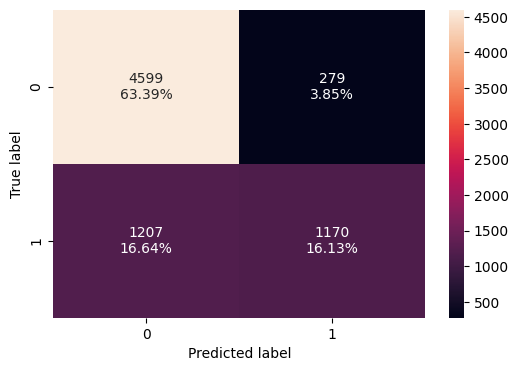

In [123]:
# creating a  confusion matrix for test data
plot_confusion_matrix(model=svm_5, predictors= X_test, target=y_test)

In [124]:
# checking performance on test data
print("Test performance:")
svm_5_perf_test = model_performance_classification(svm_5, X_test, y_test)
svm_5_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.795176,0.492217,0.807453,0.611605


* Lower scores than default therefore poor tuning

**Support Vector Machine (Kernel = "Polynomial", Degree = 3, Gamma = 0.016, C = 0.1)**

In [125]:
# fitting SVM model
svm_6 = SVC(kernel='poly', degree=3, gamma=0.016, C=0.1, probability=True)
svm_6.fit(X_train,y_train)

SVC(C=0.1, gamma=0.016, kernel='poly', probability=True)

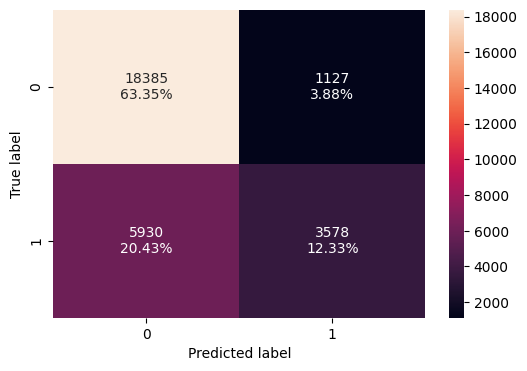

In [126]:
# creating a  confusion matrix for train data
plot_confusion_matrix(model=svm_6, predictors= X_train, target=y_train)

In [127]:
# checking performance on train data
print("Training performance:")
svm_6_perf_train = model_performance_classification(svm_6, X_train, y_train)
svm_6_perf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.756823,0.376315,0.760468,0.503483


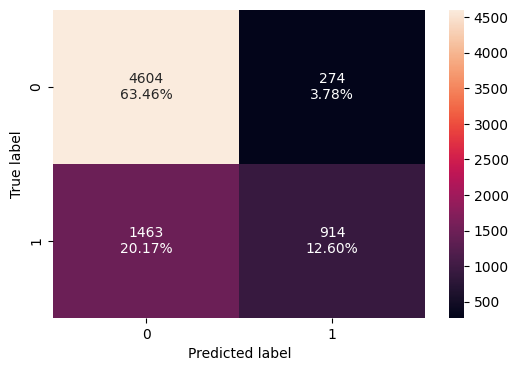

In [128]:
# creating a  confusion matrix for test data
plot_confusion_matrix(model=svm_6, predictors= X_test, target=y_test)

In [129]:
# checking performance on test data
print("Test performance:")
svm_6_perf_test = model_performance_classification(svm_6, X_test, y_test)
svm_6_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.760579,0.384518,0.76936,0.512763


* Very low scores hence underfitting

**Support Vector Machine (Kernel = "Rbf")**

In [130]:
# fitting SVM model
svm_7 = SVC(kernel='rbf', probability=True)
svm_7.fit(X_train,y_train)

SVC(probability=True)

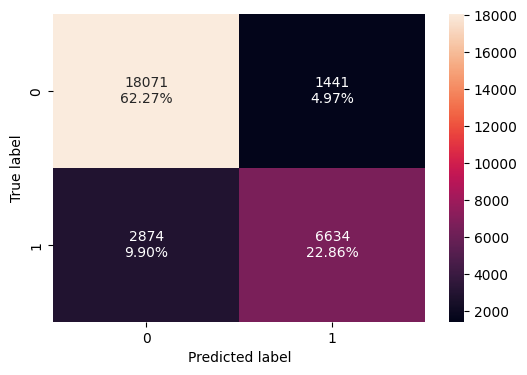

In [131]:
# creating a  confusion matrix for train data
plot_confusion_matrix(model=svm_7, predictors= X_train, target=y_train)

In [132]:
# checking performance on train data
print("Training performance:")
svm_7_perf_train = model_performance_classification(svm_7, X_train, y_train)
svm_7_perf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.851309,0.697728,0.821548,0.754593


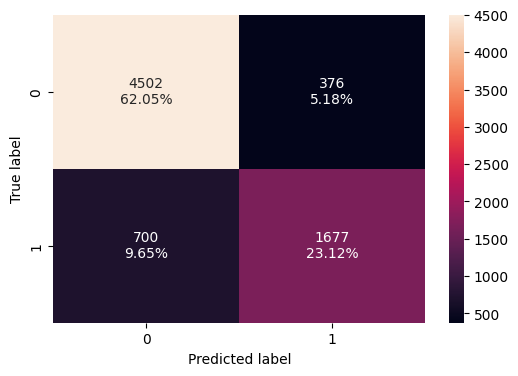

In [133]:
# creating a  confusion matrix for test data
plot_confusion_matrix(model=svm_7, predictors= X_test, target=y_test)

In [134]:
# checking performance on test data
print("Test performance:")
svm_7_perf_test = model_performance_classification(svm_7, X_test, y_test)
svm_7_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.851688,0.705511,0.816853,0.757111


**Support Vector Machine (Kernel = "rbf", Gamma = 0.016)**

In [135]:
# fitting SVM model
svm_8 = SVC(kernel='rbf', gamma=0.016, probability=True)
svm_8.fit(X_train,y_train)

SVC(gamma=0.016, probability=True)

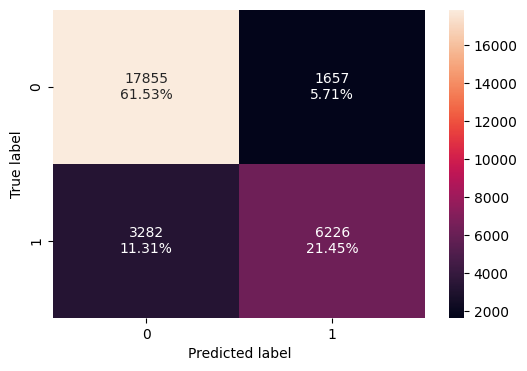

In [136]:
# creating a confusion matrix for train data
plot_confusion_matrix(model=svm_8, predictors= X_train, target=y_train)

In [137]:
# checking performance on train data
print("Training performance:")
svm_8_perf_train = model_performance_classification(svm_8, X_train, y_train)
svm_8_perf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.829807,0.654817,0.789801,0.716003


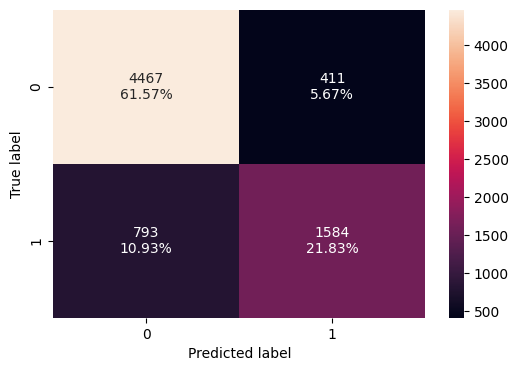

In [138]:
#creating a confusion matrix for test data
plot_confusion_matrix(model=svm_8, predictors= X_test, target=y_test)

In [139]:
# checking performance on test data
print("Test performance:")
svm_8_perf_test = model_performance_classification(svm_8, X_test, y_test)
svm_8_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.834045,0.666386,0.793985,0.724611


* Slightly lower than default RBF therefore default gamma works better

**Support Vector Machine (Kernel = "rbf", Gamma = 0.016, C = 0.1)**

In [140]:
# fitting SVM model
svm_9 = SVC(kernel='rbf', gamma=0.016, C=0.1, probability=True)
svm_9.fit(X_train,y_train)

SVC(C=0.1, gamma=0.016, probability=True)

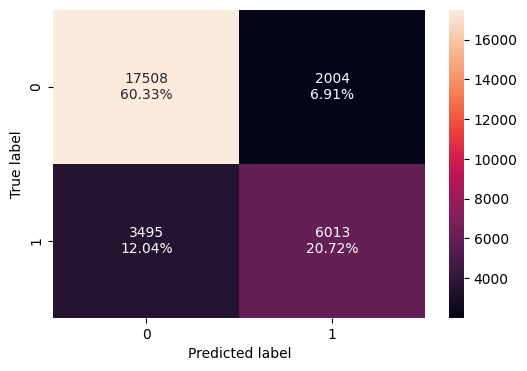

In [141]:
# creating a  confusion matrix for train data
plot_confusion_matrix(model=svm_9, predictors= X_train, target=y_train)

In [142]:
# checking performance on train data
print("Training performance:")
svm_9_perf_train = model_performance_classification(svm_9, X_train, y_train)
svm_9_perf_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.81051,0.632415,0.750031,0.68622


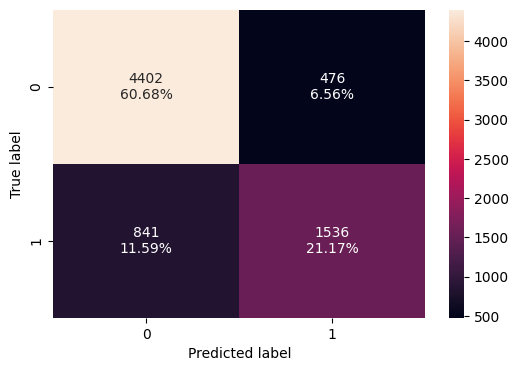

In [143]:
# creating a  confusion matrix for test data
plot_confusion_matrix(model=svm_9, predictors= X_test, target=y_test)

In [144]:
# checking performance on test data
print("Test performance:")
svm_9_perf_test = model_performance_classification(svm_9, X_test, y_test)
svm_9_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.81847,0.646193,0.763419,0.699932


* Lower train score, slightly better test score than linear, but still below default RBF

## Model Performance Comparison and Final Model Selection

In [145]:
# training performance comparison
best_models_train_comp_df = pd.concat(
    [
        knn_0_perf_train.T,
        knn_1_perf_train.T,
        nb_perf_train.T,
        svm_0_perf_train.T,
        svm_1_perf_train.T,
        svm_2_perf_train.T,
        svm_3_perf_train.T,
        svm_4_perf_train.T,
        svm_5_perf_train.T,
        svm_6_perf_train.T,
        svm_7_perf_train.T,
        svm_8_perf_train.T,
        svm_9_perf_train.T
    ],
    axis=1,
)
best_models_train_comp_df.columns = [
    "K Nearest Neighbor K=3",
    "K Nearest Neighbor K=7",
    "Naive Bayes",
    "SVM-Linear Kernel (default)",

    "SVM-Polynomial Kernel , degree = 2",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.016, C = 0.1 ",

    "SVM-Polynomial Kernel , degree = 3",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.016, C = 0.1 ",

    "SVM-Rbf Kernel",
    "SVM-Rbf Kernel , gamma = 0.016 ",
    "SVM-Rbf Kernel , gamma = 0.016, C = 0.1 ",

]

print("Best models training performance comparison:")
best_models_train_comp_df.T

Best models training performance comparison:


,Accuracy,Recall,Precision,F1
K Nearest Neighbor K=3,0.915679,0.851493,0.886650,0.868716
K Nearest Neighbor K=7,0.881806,0.789546,0.840085,0.814032
Naive Bayes,0.409373,0.964346,0.353061,0.516884
SVM-Linear Kernel (default),0.801068,0.607173,0.739086,0.666667
"SVM-Polynomial Kernel , degree = 2",0.827843,0.638199,0.795908,0.708382
"SVM-Polynomial Kernel , degree = 2 , gamma = 0.016",0.810924,0.584034,0.783769,0.669318
"SVM-Polynomial Kernel , degree = 2 , gamma = 0.016, C = 0.1",0.783701,0.486327,0.768489,0.595684
"SVM-Polynomial Kernel , degree = 3",0.843728,0.666281,0.823048,0.736414
"SVM-Polynomial Kernel , degree = 3 , gamma = 0.016",0.787870,0.480753,0.789465,0.597594
"SVM-Polynomial Kernel , degree = 3 , gamma = 0.016, C = 0.1",0.756823,0.376315,0.760468,0.503483


In [146]:
# testing performance comparison
best_models_test_comp_df = pd.concat(
    [
        knn_0_perf_test.T,
        knn_1_perf_test.T,
        nb_perf_test.T,
        svm_0_perf_test.T,
        svm_1_perf_test.T,
        svm_2_perf_test.T,
        svm_3_perf_test.T,
        svm_4_perf_test.T,
        svm_5_perf_test.T,
        svm_6_perf_test.T,
        svm_7_perf_test.T,
        svm_8_perf_test.T,
        svm_9_perf_test.T,

    ],
    axis=1,
)
best_models_test_comp_df.columns = [
    "K Nearest Neighbor K=3",
    "K Nearest Neighbor K=7",
    "Naive Bayes",
    "SVM-Linear Kernel (default)",

    "SVM-Polynomial Kernel , degree = 2",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.016, C = 0.1 ",

    "SVM-Polynomial Kernel , degree = 3",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.016, C = 0.1 ",

    "SVM-Rbf Kernel",
    "SVM-Rbf Kernel , degree = 3 , gamma = 0.016 ",
    "SVM-Rbf Kernel , degree = 3 , gamma = 0.016, C = 0.1 ",

]

print("Best models test set performance comparison:")
best_models_test_comp_df.T

Best models test set performance comparison:


,Accuracy,Recall,Precision,F1
K Nearest Neighbor K=3,0.854721,0.756416,0.791025,0.773333
K Nearest Neighbor K=7,0.858305,0.750947,0.803692,0.776425
Naive Bayes,0.406065,0.961716,0.351476,0.514807
SVM-Linear Kernel (default),0.814059,0.629365,0.761711,0.689242
"SVM-Polynomial Kernel , degree = 2",0.831840,0.655869,0.795003,0.718764
"SVM-Polynomial Kernel , degree = 2 , gamma = 0.016",0.817092,0.602861,0.789097,0.683520
"SVM-Polynomial Kernel , degree = 2 , gamma = 0.016, C = 0.1",0.792970,0.502735,0.788779,0.614080
"SVM-Polynomial Kernel , degree = 3",0.847002,0.679007,0.823049,0.744122
"SVM-Polynomial Kernel , degree = 3 , gamma = 0.016",0.795176,0.492217,0.807453,0.611605
"SVM-Polynomial Kernel , degree = 3 , gamma = 0.016, C = 0.1",0.760579,0.384518,0.769360,0.512763


* **svm_7 (SVM with RBF Kernel (default))** has one of the highest F1 test score among all models, meaning it generalizes better on unseen data
* Train and test scores are close, suggesting the model is not overfitting
* RBF kernel can capture complex patterns in the data, which is useful for real-world problems like hotel cancellations

**Feature Importance**

Text(0.5, 1.0, 'Feature Importance')

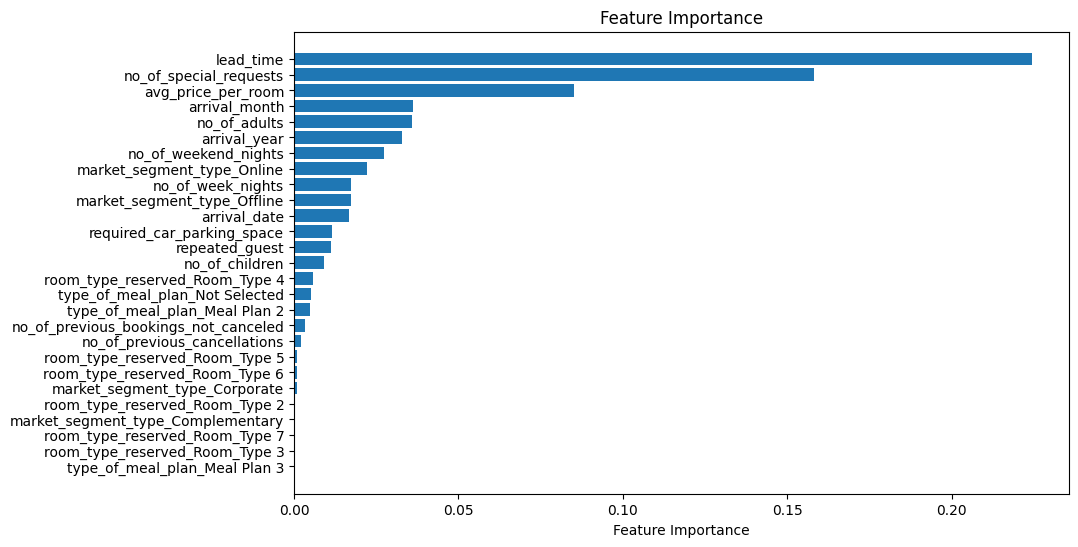

In [147]:
# The best estimator
best_estimator = svm_7

# Get feature names
feature_names = X_train.columns

# Calculate permutation importance with fewer repeats and parallel processing
perm_importance = permutation_importance(best_estimator, X_train, y_train, scoring='f1', n_repeats=3, n_jobs=-1)

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})

# Sort feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance in descending order
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Feature Importance');
plt.title('Feature Importance')

* `Lead time` is the strongest predictor which means longer booking lead times increase the likelihood of cancellation
* `Number of special requests` reduces cancellations, more requests indicate higher commitment
* `Average price per room` influences cancellations – higher prices correlate with higher cancellation risk
* `Market segment type` (Online/Offline) is important.Online bookings show higher cancellation tendencies
* Arrival details (`year`, `month`, `parking space`, `repeat guest`) have moderate impact, repeat guests and parking needs lower cancellations

## Actionable Insights and Recommendations

### Insights

* Longer lead times increase cancellations as customers explore alternatives or forget bookings
* Online customers are more price-sensitive and prone to cancel
* High prices with fewer services increase cancellations compared to competitors
* Customers with few or no special requests are more likely to cancel
* Ambiguity in rules may push customers to cancel freely

### Business Recommendations

* Combine proactive engagement, flexible payment and pricing, personalized booking options, and clear cancellation rules to significantly reduce cancellations, focusing especially on long lead-time and online bookings. They will be expanded below:
  * Implement proactive engagement (e.g reminders, personalized offers) and flexible re-confirmation options for long-lead bookings
  * Offer flexible payment options (e.g installments, partial deposits) and competitive pricing with bundled services to reduce cancellations
  * Regularly benchmark against market rates, introduce discounts/seasonal offers, and highlight added value (e.g free breakfast, late checkout)
  * Encourage guests to personalize their bookings (e.g meals, room view, amenities) and reward commitment with small perks (e.g free upgrade options)
  * Enforce clear policies (e.g non-refundable after 48 hours) while balancing customer satisfaction with fairness (flexible rescheduling instead of strict refunds)